<img src= "https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.myjoyonline.com%2Fprovisional-2021-wassce-results-released-with-3667-candidates-withheld%2F&psig=AOvVaw0eU1_ykue5iqVwf-l49t46&ust=1668298086633000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCOj7ouusp_sCFQAAAAAdAAAAABAD" alt = 'Waec Examination'/>

In [1004]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import profile_report
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

In [1005]:
%matplotlib inline

# # Versions
# print(mpl.__version__)  #> 3.0.0
# print(sns.__version__)  #> 0.9.0

# Data Ingestion

In [1006]:
internal_marks = pd.read_excel(".\waec_dataset_v2.xlsx",skiprows = 3,
                   sheet_name = " INTERNAL MARKS",names = ['Eng1','Eng2','Eng3','Math1','Math2','Math3','Int1','Int2','Int3'])
internal_marks.head()

,,,,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
1.0,2040900119,NaN,G/A,45.0,41.0,44.0,51.0,47.0,41.0,40.0,45.0,69.0
2.0,2040900219,NaN,G/A,56.0,57.0,60.0,52.0,44.0,51.0,43.0,54.0,55.0
3.0,2040900319,NaN,G/A,41.0,45.0,54.0,42.0,54.0,44.0,48.0,52.0,42.0
4.0,2040900419,NaN,G/A,43.0,40.0,41.0,43.0,51.0,43.0,39.0,45.0,44.0
5.0,2040900519,NaN,G/A,55.0,54.0,45.0,66.0,55.0,52.0,62.0,60.0,45.0


In [1007]:
wassce_2019 = pd.read_excel(".\waec_dataset_v2.xlsx",skiprows = 3, sheet_name = "2019 WASSCE")
wasce_2019.head()

,index,gender,program,english,mathematics,int_sci,year
0,2040900119,F,G/A,B2,D7,B3,2019
1,2040900219,F,G/A,C5,B3,B3,2019
2,2040900319,F,G/A,C4,B3,B2,2019
3,2040900419,M,G/A,E8,D7,C4,2019
4,2040900519,M,G/A,F9,D7,C6,2019


In [1008]:
wassce_2020 = pd.read_excel(".\waec_dataset_v2.xlsx",skiprows = 3, sheet_name = "2020 WASSCE")
wassce_2020.head()

,S\NO.,INDEX NO.,GENDER,PROGRAM,ENGLISH,MATHEMATICS,INT. SCI
0,NaN,2040900120,F,BUS,E8,C6,D7
1,NaN,2040900220,M,BUS,D7,B3,C5
2,NaN,2040900320,M,G/A,E8,E8,E8
3,NaN,2040900420,M,G/A,E8,B3,D7
4,NaN,2040900520,M,G/A,C6,A1,C5


In [1009]:
wassce_2021 = pd.read_excel(".\waec_dataset_v2.xlsx",skiprows = 3, sheet_name = " 2021 WASSCE")
wassce_2021.head()

,S\NO.,INDEX NO.,GENDER,PROGRAM,ENGLISH,MATHEMATICS,INT. SCI
0,NaN,2040900121,M,G/A,F9,F9,E8
1,NaN,2040900221,M,G/A,F9,F9,F9
2,NaN,2040900321,M,V/A,F9,F9,E8
3,NaN,2040900421,M,V/A,F9,F9,F9
4,NaN,2040900521,F,H/E,F9,F9,E8


In [1010]:
# profile the ingested data samples

In [1011]:
# Report

# Data Wrangling

### Task

Merging multiple data sources into a single dataset for analysis <br>
Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them <br>
Deleting data that’s either unnecessary or irrelevant to the project you’re working on <br>
Identifying extreme outliers in data and either explaining the discrepancies or removing them so that analysis can take place

### Internal Marks

In [1012]:
internal_marks = internal_marks.reset_index()
internal_marks.head(2)

,level_0,level_1,level_2,level_3,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
0,1.0,2040900119,NaN,G/A,45.0,41.0,44.0,51.0,47.0,41.0,40.0,45.0,69.0
1,2.0,2040900219,NaN,G/A,56.0,57.0,60.0,52.0,44.0,51.0,43.0,54.0,55.0


In [1013]:
internal_marks = internal_marks.drop(columns = ['level_0','level_2','level_3','level_3'],axis = 1) 
internal_marks.head(2)

,level_1,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
0,2040900119,45.0,41.0,44.0,51.0,47.0,41.0,40.0,45.0,69.0
1,2040900219,56.0,57.0,60.0,52.0,44.0,51.0,43.0,54.0,55.0


In [1014]:
internal_marks = internal_marks.rename(columns= {"level_1":"idx"})
internal_marks.head(2)

,idx,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
0,2040900119,45.0,41.0,44.0,51.0,47.0,41.0,40.0,45.0,69.0
1,2040900219,56.0,57.0,60.0,52.0,44.0,51.0,43.0,54.0,55.0


In [1015]:
#checking for null values in internal marks data
internal_marks.isna().sum()

idx      0
Eng1     2
Eng2     2
Eng3     2
Math1    2
Math2    2
Math3    2
Int1     2
Int2     2
Int3     2
dtype: int64

In [1016]:
internal_marks[internal_marks.Eng1.isin([np.NaN])]

,idx,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
76,2040907719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,2040907720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1017]:
internal_marks = internal_marks.set_index('idx')
internal_marks.head(2)

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3
idx,,,,,,,,,
2040900119,45.0,41.0,44.0,51.0,47.0,41.0,40.0,45.0,69.0
2040900219,56.0,57.0,60.0,52.0,44.0,51.0,43.0,54.0,55.0


In [1018]:
internal_marks.index.unique()

Int64Index([2040900119, 2040900219, 2040900319, 2040900419, 2040900519,
            2040900619, 2040900719, 2040900819, 2040900919, 2040901019,
            ...
            2040935821, 2040935921, 2040936021, 2040936121, 2040936221,
            2040936321, 2040936421, 2040936521, 2040936621, 2040936721],
           dtype='int64', name='idx', length=1001)

In [1019]:
print("Duplicated Samples:",internal_marks.index.duplicated().sum())

Duplicated Samples: 92


In [1020]:
print("True or Non Duplicates:",len(internal_marks.index.unique()))

True or Non Duplicates: 1001


 #### Report 

### Waec Data

In [1021]:
def fix_wasce_data_columns(dataframe:pd.DataFrame,year:int)-> pd.DataFrame:
    dataframe = dataframe.drop(columns = [r'S\NO.'],axis = 1)
    dataframe = dataframe.rename(columns= {"INDEX NO.":"idx"})
    lower_columns = lambda x:[i.lower().replace(".","_").replace(" ","") for i in x.columns]
    new_columns = lower_columns(dataframe)
    dataframe.columns = new_columns
    dataframe['year'] = year
    
    return dataframe

In [1022]:
wassce_2019 = fix_wasce_data_columns(wassce_2019,year = '2019')
wassce_2019.head(2)

,idx,gender,program,english,mathematics,int_sci,year
0,2040900119,F,G/A,B2,D7,B3,2019
1,2040900219,F,G/A,C5,B3,B3,2019


In [1023]:
wassce_2019.isna().sum()

idx            0
gender         0
program        0
english        0
mathematics    0
int_sci        0
year           0
dtype: int64

In [1024]:
wassce_2020 = fix_wasce_data_columns(wassce_2020,year = '2020')
wassce_2020.head(2)

,idx,gender,program,english,mathematics,int_sci,year
0,2040900120,F,BUS,E8,C6,D7,2020
1,2040900220,M,BUS,D7,B3,C5,2020


In [1025]:
wassce_2021 = fix_wasce_data_columns(wassce_2021,year = '2021')
wassce_2021.head(2)

,idx,gender,program,english,mathematics,int_sci,year
0,2040900121,M,G/A,F9,F9,E8,2021
1,2040900221,M,G/A,F9,F9,F9,2021


In [1026]:
print("-"*5,"checking for duplicates","-"*5,"\n")

print("Wassce 2019:",wassce_2019.set_index('idx').index.duplicated().sum(),"\n")
print("Wassce 2020:",wassce_2020.set_index('idx').index.duplicated().sum(),"\n")
print("Wassce 2021:",wassce_2021.set_index('idx').index.duplicated().sum(),"\n")

----- checking for duplicates ----- 

Wassce 2019: 0 

Wassce 2020: 0 

Wassce 2021: 0 



### Merge Data

In [1027]:
waec_df = pd.concat([wassce_2019,wassce_2020,wassce_2021],axis = 0)
waec_df.head(3)

,idx,gender,program,english,mathematics,int_sci,year
0,2040900119,F,G/A,B2,D7,B3,2019
1,2040900219,F,G/A,C5,B3,B3,2019
2,2040900319,F,G/A,C4,B3,B2,2019


In [1028]:
waec_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idx          1001 non-null   int64 
 1   gender       1001 non-null   object
 2   program      1001 non-null   object
 3   english      1001 non-null   object
 4   mathematics  1001 non-null   object
 5   int_sci      1001 non-null   object
 6   year         1001 non-null   object
dtypes: int64(1), object(6)
memory usage: 62.6+ KB


In [1029]:
waec_df = waec_df.set_index('idx')
waec_df.head(2)

,gender,program,english,mathematics,int_sci,year
idx,,,,,,
2040900119,F,G/A,B2,D7,B3,2019
2040900219,F,G/A,C5,B3,B3,2019


In [1030]:
df = internal_marks.join(other = waec_df,on = 'idx',how = 'left')
df.head()

,Eng1,Eng2,Eng3,Math1,Math2,Math3,Int1,Int2,Int3,gender,program,english,mathematics,int_sci,year
idx,,,,,,,,,,,,,,,
2040900119,45.0,41.0,44.0,51.0,47.0,41.0,40.0,45.0,69.0,F,G/A,B2,D7,B3,2019
2040900219,56.0,57.0,60.0,52.0,44.0,51.0,43.0,54.0,55.0,F,G/A,C5,B3,B3,2019
2040900319,41.0,45.0,54.0,42.0,54.0,44.0,48.0,52.0,42.0,F,G/A,C4,B3,B2,2019
2040900419,43.0,40.0,41.0,43.0,51.0,43.0,39.0,45.0,44.0,M,G/A,E8,D7,C4,2019
2040900519,55.0,54.0,45.0,66.0,55.0,52.0,62.0,60.0,45.0,M,G/A,F9,D7,C6,2019


In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093 entries, 2040900119 to 2040936721
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Eng1         1091 non-null   float64
 1   Eng2         1091 non-null   float64
 2   Eng3         1091 non-null   float64
 3   Math1        1091 non-null   float64
 4   Math2        1091 non-null   float64
 5   Math3        1091 non-null   float64
 6   Int1         1091 non-null   float64
 7   Int2         1091 non-null   float64
 8   Int3         1091 non-null   float64
 9   gender       1072 non-null   object 
 10  program      1072 non-null   object 
 11  english      1072 non-null   object 
 12  mathematics  1072 non-null   object 
 13  int_sci      1072 non-null   object 
 14  year         1072 non-null   object 
dtypes: float64(9), object(6)
memory usage: 168.9+ KB


In [1073]:
df = df.rename(columns = {
          "Eng1":"eng_yr1",
          "Eng2":"eng_yr2",
          "Eng3":"eng_yr3",
    
          "Math1":"math_yr1",
          "Math2":"math_yr2",
          "Math3":"math_yr3",
                          
          "Int1":"sci_yr1",
          "Int2":"sci_yr2",
          "Int3":"sci_yr3",
                          
          "mathematics":"math_waec",
          "int_sci":"sci_waec",
          "english":"eng_waec"})

df.head(2)

,eng_yr1,eng_yr2,eng_yr3,math_yr1,math_yr2,math_yr3,sci_yr1,sci_yr2,sci_yr3,gender,program,eng_waec,math_waec,sci_waec,year
0,45.0,41.0,44.0,51.0,47.0,41.0,40.0,45.0,69.0,F,G/A,B2,D7,B3,2019
1,56.0,57.0,60.0,52.0,44.0,51.0,43.0,54.0,55.0,F,G/A,C5,B3,B3,2019


In [1033]:
_ = df[df.duplicated()].index
df.loc[_]

,eng_yr1,eng_yr2,eng_yr3,math_y1,math_y2,math_y3,sci_yr1,sci_yr2,sci_yr3,gender,program,eng_waec,math_waec,sci_waec,year
idx,,,,,,,,,,,,,,,
2040921519,40.0,55.0,62.0,56.0,46.0,47.0,66.0,56.0,65.0,F,G/A,F9,D7,D7,2019
2040940320,56.0,59.0,55.0,70.0,67.0,60.0,72.0,70.0,66.0,F,H/E,D7,B3,E8,2020
2040920521,67.0,66.0,66.0,67.0,70.0,71.0,56.0,70.0,60.0,M,G/A,F9,F9,F9,2021
2040920521,45.0,40.0,23.0,67.0,65.0,54.0,56.0,66.0,60.0,M,G/A,F9,F9,F9,2021
2040916421,80.0,66.0,70.0,67.0,62.0,67.0,70.0,66.0,76.0,F,G/A,F9,F9,E8,2021
2040916421,66.0,65.0,60.0,68.0,56.0,58.0,18.0,20.0,13.0,F,G/A,F9,F9,E8,2021
2040918021,45.0,43.0,12.0,88.0,70.0,66.0,67.0,55.0,45.0,F,G/A,F9,F9,D7,2021
2040918021,56.0,59.0,55.0,70.0,67.0,60.0,72.0,70.0,66.0,F,G/A,F9,F9,D7,2021
2040919721,69.0,67.0,53.0,56.0,65.0,40.0,67.0,66.0,56.0,F,H/E,F9,F9,E8,2021


In [1034]:
#unless
duplicated_idx = df.index[df.index.duplicated()]
duplicated_idx

Int64Index([2040936320, 2040912121, 2040912221, 2040912321, 2040912421,
            2040912521, 2040912621, 2040912721, 2040912821, 2040912921,
            2040913021, 2040913121, 2040913221, 2040913321, 2040913421,
            2040913521, 2040913821, 2040913921, 2040914021, 2040914121,
            2040914221, 2040914321, 2040914421, 2040914521, 2040914621,
            2040914921, 2040915021, 2040915121, 2040915221, 2040915321,
            2040915421, 2040915521, 2040915621, 2040915721, 2040915821,
            2040915921, 2040916021, 2040916221, 2040916321, 2040916421,
            2040916621, 2040916721, 2040916821,  204091621, 2040917021,
            2040917121, 2040917221, 2040917321, 2040917521, 2040917621,
            2040917721, 2040917821, 2040917921, 2040918021, 2040918121,
            2040918221, 2040918321, 2040918421, 2040918521, 2040918621,
            2040918721, 2040918821, 2040918921, 2040919121, 2040919221,
            2040919321, 2040919421, 2040919521, 2040919621, 2040

In [1035]:
print("Number of Duplicates : ",len(df) - len(set(df.index)))

Number of Duplicates :  92


In [1036]:
df.loc[duplicated_idx]

,eng_yr1,eng_yr2,eng_yr3,math_y1,math_y2,math_y3,sci_yr1,sci_yr2,sci_yr3,gender,program,eng_waec,math_waec,sci_waec,year
idx,,,,,,,,,,,,,,,
2040936320,66.0,52.0,34.0,56.0,54.0,56.0,67.0,56.0,46.0,F,V/A,E8,C6,C6,2020
2040936320,40.0,47.0,31.0,67.0,56.0,45.0,66.0,45.0,46.0,F,V/A,E8,C6,C6,2020
2040912121,55.0,65.0,54.0,12.0,9.0,10.0,36.0,37.0,21.0,F,G/A,F9,F9,E8,2021
2040912121,18.0,21.0,8.0,34.0,28.0,16.0,32.0,22.0,10.0,F,G/A,F9,F9,E8,2021
2040912221,60.0,61.0,44.0,30.0,33.0,32.0,45.0,37.0,30.0,F,G/A,F9,F9,E8,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2040921821,56.0,45.0,50.0,56.0,55.0,40.0,34.0,20.0,24.0,M,V/A,F9,F9,E8,2021
2040921921,54.0,51.0,51.0,68.0,66.0,56.0,44.0,45.0,43.0,M,G/A,F9,F9,E8,2021
2040921921,65.0,54.0,54.0,67.0,56.0,34.0,56.0,54.0,55.0,M,G/A,F9,F9,E8,2021


In [1037]:
df.shape

(1093, 15)

In [1040]:
try:
    df = df.reset_index().drop_duplicates(subset = 'idx',keep  = 'first')
    assert df.idx.duplicated().any() == False
except AssertionError:
    print("Duplicates still present")
finally:
    df =  df.drop(columns = ['idx'],axis = 1)
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1001 entries, 0 to 1092
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eng_yr1    999 non-null    float64
 1   eng_yr2    999 non-null    float64
 2   eng_yr3    999 non-null    float64
 3   math_y1    999 non-null    float64
 4   math_y2    999 non-null    float64
 5   math_y3    999 non-null    float64
 6   sci_yr1    999 non-null    float64
 7   sci_yr2    999 non-null    float64
 8   sci_yr3    999 non-null    float64
 9   gender     980 non-null    object 
 10  program    980 non-null    object 
 11  eng_waec   980 non-null    object 
 12  math_waec  980 non-null    object 
 13  sci_waec   980 non-null    object 
 14  year       980 non-null    object 
dtypes: float64(9), object(6)
memory usage: 125.1+ KB


None

In [1041]:
df.isna().sum()

eng_yr1       2
eng_yr2       2
eng_yr3       2
math_y1       2
math_y2       2
math_y3       2
sci_yr1       2
sci_yr2       2
sci_yr3       2
gender       21
program      21
eng_waec     21
math_waec    21
sci_waec     21
year         21
dtype: int64

In [1042]:
df.columns

Index(['eng_yr1', 'eng_yr2', 'eng_yr3', 'math_y1', 'math_y2', 'math_y3',
       'sci_yr1', 'sci_yr2', 'sci_yr3', 'gender', 'program', 'eng_waec',
       'math_waec', 'sci_waec', 'year'],
      dtype='object')

In [1044]:
#unique values in subject columns
def getUniques():
    print("-"*15,"Unique Values In Columns","-"*15,"\n")
    print("English - ",list(df.eng_waec.unique()),"\n")
    print("Mathematics  - ",list(df.math_waec.unique()),"\n")
    print("Inter Science - ",list(df.sci_waec.unique()),"\n")
    print("Gender - ",list(df.gender.unique()),"\n")
    print("Program - ",list(df.program.unique()),"\n")

In [1045]:
getUniques()

--------------- Unique Values In Columns --------------- 

English -  ['B2', 'C5', 'C4', 'E8', 'F9', 'C6', 'D7', 'B3', nan, 'XX', 'E', 'X', 'F9 '] 

Mathematics  -  ['D7', 'B3', 'C6', 'F9', 'E8', 'C5', nan, 'C4', 'B2', 'A1', 'XX', 'X', 'D'] 

Inter Science -  ['B3', 'B2', 'C4', 'C6', 'D7', 'C5', 'F9', 'E8', nan, 'A1', 'XX', 'X', 'E9'] 

Gender -  ['F', 'M', nan] 

Program -  ['G/A', 'V/A', 'SCI', 'BUS', 'AGRIC', 'H/E', nan] 



In [1046]:
df[df.eng_waec.isin(['XX','X','E','D'])]

,eng_yr1,eng_yr2,eng_yr3,math_y1,math_y2,math_y3,sci_yr1,sci_yr2,sci_yr3,gender,program,eng_waec,math_waec,sci_waec,year
196,67.0,55.0,56.0,56.0,45.0,41.0,77.0,76.0,74.0,M,G/A,XX,XX,XX,2019
200,56.0,50.0,55.0,80.0,79.0,70.0,67.0,60.0,60.0,M,G/A,E,C6,C6,2019
246,45.0,46.0,40.0,66.0,70.0,50.0,55.0,65.0,55.0,F,G/A,XX,XX,XX,2020
266,45.0,32.0,12.0,18.0,23.0,11.0,10.0,21.0,9.0,F,H/E,X,X,X,2020
373,67.0,67.0,60.0,34.0,54.0,32.0,56.0,67.0,65.0,F,G/A,XX,XX,XX,2020
493,30.0,20.0,17.0,40.0,44.0,31.0,21.0,14.0,9.0,F,V/A,XX,XX,XX,2020
522,73.0,70.0,60.0,66.0,70.0,66.0,44.0,53.0,60.0,F,H/E,XX,XX,XX,2020
713,32.0,12.0,10.0,11.0,34.0,12.0,34.0,20.0,22.0,M,V/A,XX,XX,XX,2021
817,45.0,51.0,42.0,79.0,67.0,67.0,55.0,65.0,40.0,M,G/A,XX,XX,XX,2021
1073,67.0,70.0,61.0,54.0,67.0,55.0,34.0,33.0,41.0,F,G/A,XX,XX,XX,2021


In [1048]:
try:
    df = df.replace(['E','E9'],'E8') #replace E and E9 with E8| applies to all all columns
    df = df.replace(['XX','X'],np.NaN) #replace all X and XX with Nulls | applies to all columns
    df = df.replace('D','D7') #replace all D entries with D7 | main target is the math column
    
    df = df.dropna() #drop all nulls
    
    #make assertions
    check = [i == False for i in df.isna().any()]
    assert False not in check  

except AssertionError:
    print("Unsuccessfull execution")
finally:
    display(df.describe())

,eng_yr1,eng_yr2,eng_yr3,math_y1,math_y2,math_y3,sci_yr1,sci_yr2,sci_yr3
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,56.310950,53.341942,45.628099,56.270661,54.173554,46.210744,53.444215,51.359504,43.102273
std,16.192463,16.955621,18.902573,17.099595,17.444337,18.814036,17.198729,17.306319,19.337766
min,10.000000,10.000000,8.000000,10.000000,9.000000,8.000000,9.000000,9.000000,8.000000
25%,45.000000,44.000000,31.000000,45.000000,44.750000,32.000000,44.000000,40.000000,30.000000
50%,56.000000,55.500000,50.000000,56.000000,56.000000,50.000000,55.000000,55.000000,45.000000
75%,67.000000,67.000000,60.000000,67.000000,67.000000,60.000000,66.000000,66.000000,60.000000
max,88.000000,88.000000,87.000000,88.000000,87.000000,80.000000,88.000000,88.000000,87.000000


In [1051]:
df.isna().sum()

eng_yr1      0
eng_yr2      0
eng_yr3      0
math_y1      0
math_y2      0
math_y3      0
sci_yr1      0
sci_yr2      0
sci_yr3      0
gender       0
program      0
eng_waec     0
math_waec    0
sci_waec     0
year         0
dtype: int64

In [ ]:
### Detecting Outliers

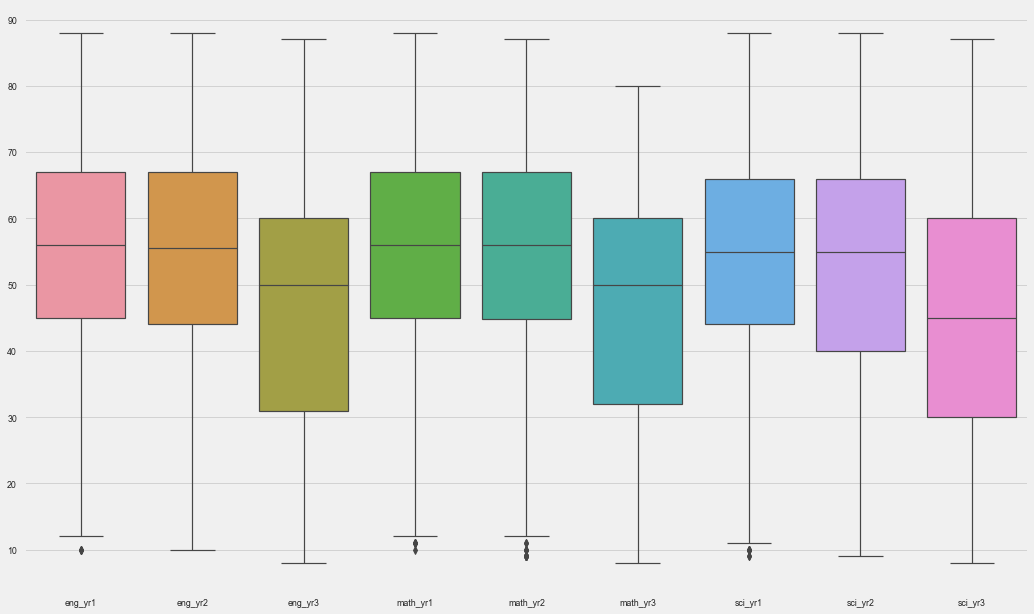

In [1128]:
sns.boxplot(df);

In [1135]:
df.min()

eng_yr1       10.0
eng_yr2       10.0
eng_yr3        8.0
math_yr1      10.0
math_yr2       9.0
math_yr3       8.0
sci_yr1        9.0
sci_yr2        9.0
sci_yr3        8.0
gender           F
program      AGRIC
eng_waec        B2
math_waec       A1
sci_waec        A1
year          2019
dtype: object

### Report

# Exploratory Data Analysis

In [1049]:
df.dtypes

eng_yr1      float64
eng_yr2      float64
eng_yr3      float64
math_y1      float64
math_y2      float64
math_y3      float64
sci_yr1      float64
sci_yr2      float64
sci_yr3      float64
gender        object
program       object
eng_waec      object
math_waec     object
sci_waec      object
year          object
dtype: object

# Internal Marks

In [1050]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('fivethirtyeight')
# sns.set_style("white")

In [1123]:
df.describe()

,eng_yr1,eng_yr2,eng_yr3,math_yr1,math_yr2,math_yr3,sci_yr1,sci_yr2,sci_yr3
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000
mean,56.310950,53.341942,45.628099,56.270661,54.173554,46.210744,53.444215,51.359504,43.102273
std,16.192463,16.955621,18.902573,17.099595,17.444337,18.814036,17.198729,17.306319,19.337766
min,10.000000,10.000000,8.000000,10.000000,9.000000,8.000000,9.000000,9.000000,8.000000
25%,45.000000,44.000000,31.000000,45.000000,44.750000,32.000000,44.000000,40.000000,30.000000
50%,56.000000,55.500000,50.000000,56.000000,56.000000,50.000000,55.000000,55.000000,45.000000
75%,67.000000,67.000000,60.000000,67.000000,67.000000,60.000000,66.000000,66.000000,60.000000
max,88.000000,88.000000,87.000000,88.000000,87.000000,80.000000,88.000000,88.000000,87.000000


In [1370]:
def plot_kde(data:pd.DataFrame,columns,title:str,alpha =  0.4, fontweight = 'bold',legend = ["Year1 ","Year 2","Year 3"]):
    sns.set_context("paper",font_scale=1)
    sns.kdeplot(data=data[columns],fill = True,alpha = alpha)
    plt.xlabel('Score');
    plt.title(title, fontsize=15, fontweight=fontweight)
    plt.legend(legend)
    plt.show()

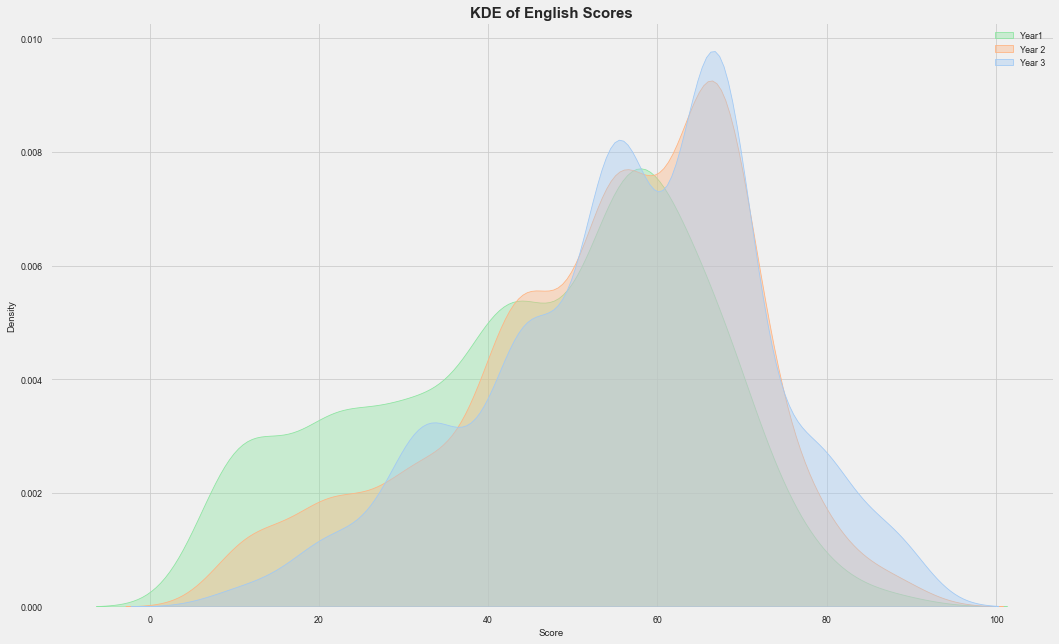

In [1373]:
plot_kde(data = df,columns = [x for x in df.columns if x.startswith('eng_y')], title = 'KDE of English Scores')

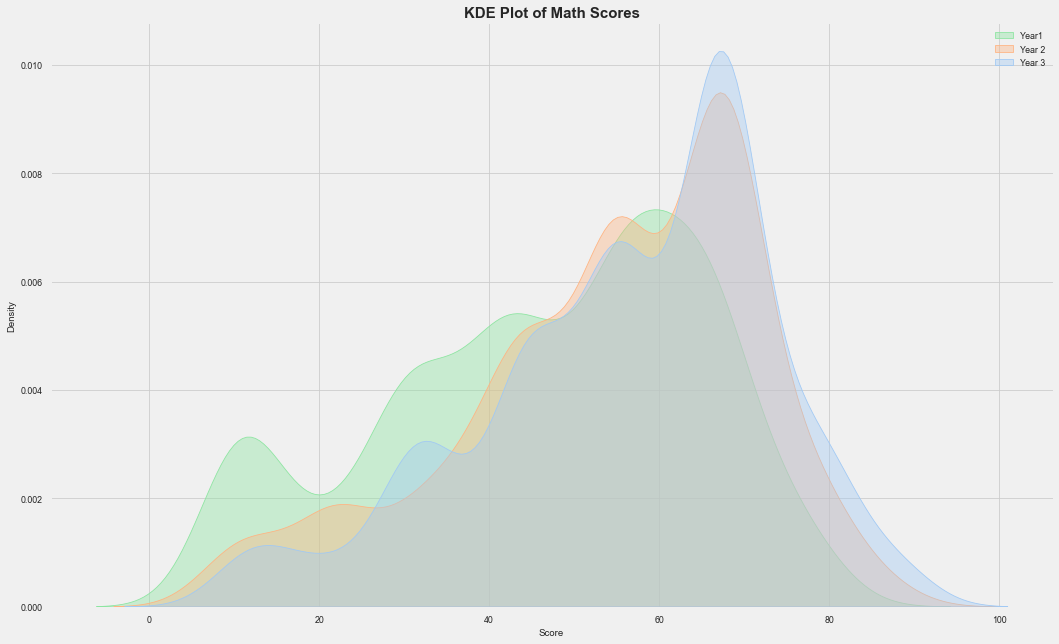

In [1376]:
plot_kde(data = df,columns = [x for x in df.columns if x.startswith('math_y')],title = 'KDE Plot of Math Scores')

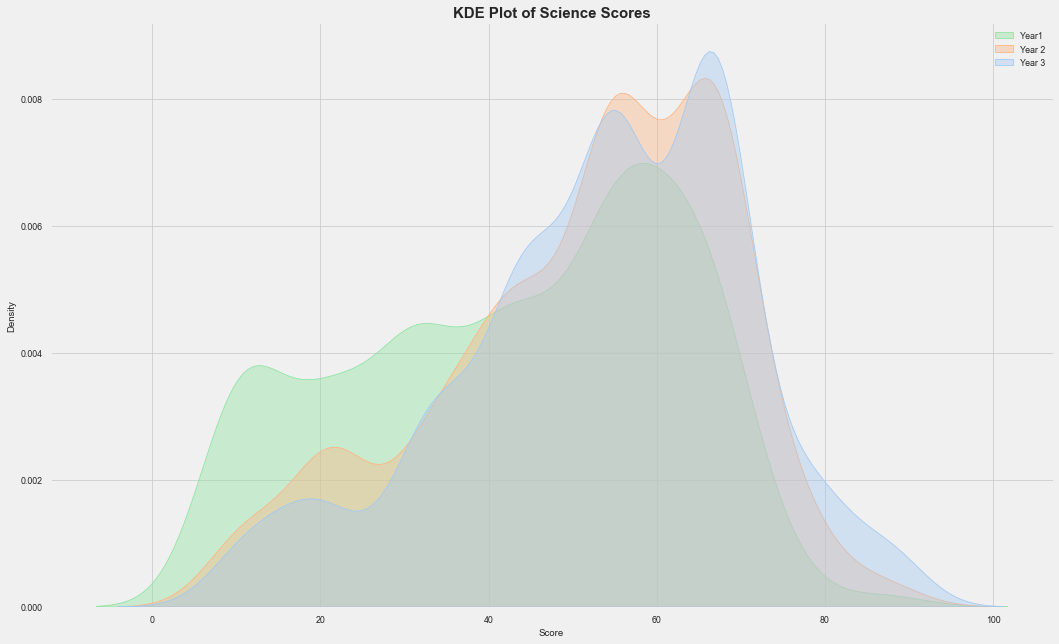

In [1377]:
plot_kde(data = df,columns = [x for x in df.columns if x.startswith('sci_y')],title = 'KDE Plot of Science Scores')

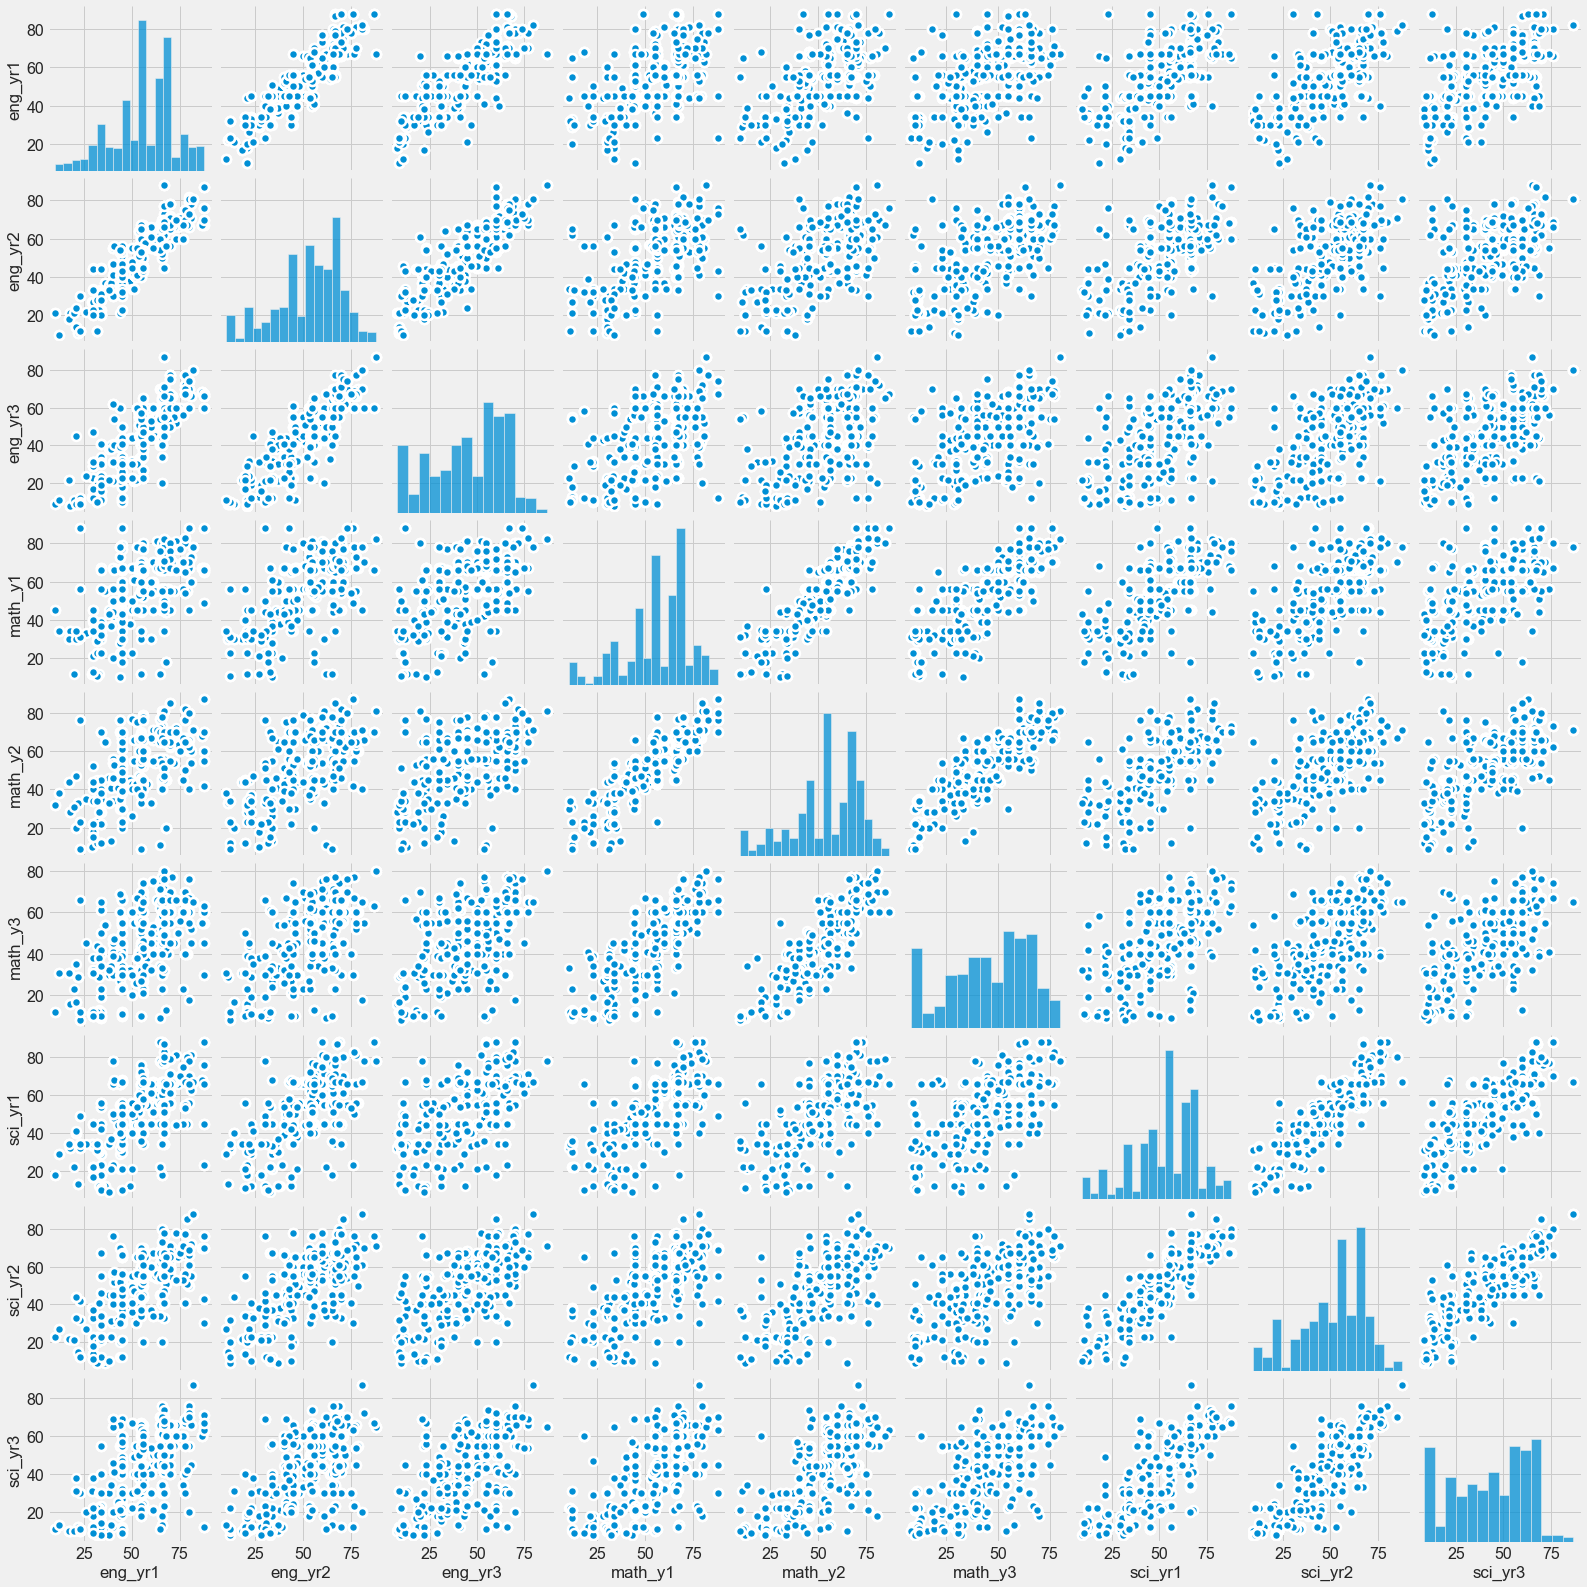

In [1052]:
sns.pairplot(df.select_dtypes(float), kind="scatter",plot_kws=dict(s=80, edgecolor= "white", linewidth=2.5));
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.show();

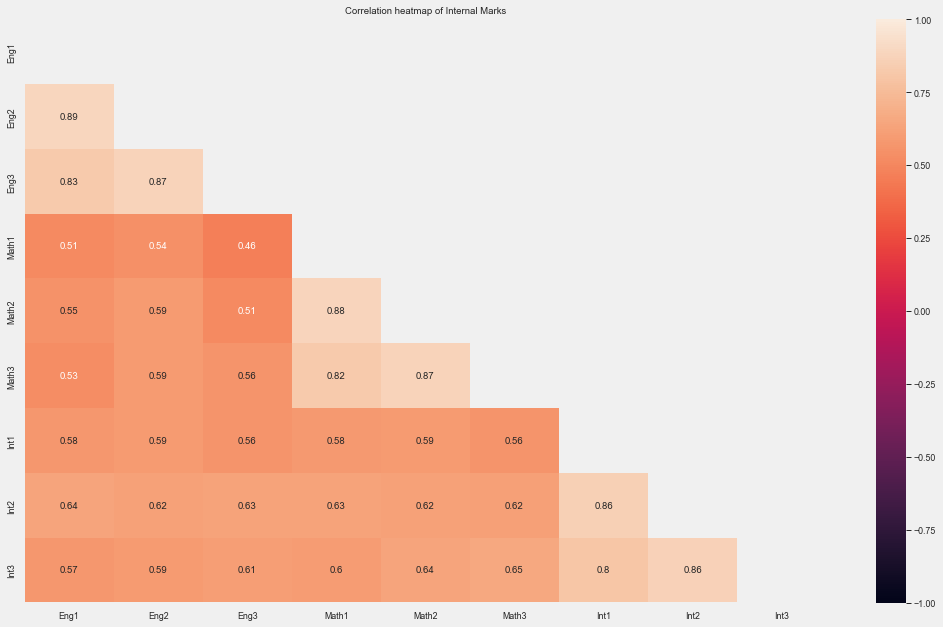

In [1347]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
ax = sns.heatmap(internal_marks.corr(),annot = True,mask = mask,vmin = -1,vmax = 1);
plt.title('Correlation heatmap of Internal Marks');

#### Explore the relationship between student performance in a subject from first year to third year

In [1057]:
df.head()

,eng_yr1,eng_yr2,eng_yr3,math_y1,math_y2,math_y3,sci_yr1,sci_yr2,sci_yr3,gender,program,eng_waec,math_waec,sci_waec,year
0,45.0,41.0,44.0,51.0,47.0,41.0,40.0,45.0,69.0,F,G/A,B2,D7,B3,2019
1,56.0,57.0,60.0,52.0,44.0,51.0,43.0,54.0,55.0,F,G/A,C5,B3,B3,2019
2,41.0,45.0,54.0,42.0,54.0,44.0,48.0,52.0,42.0,F,G/A,C4,B3,B2,2019
3,43.0,40.0,41.0,43.0,51.0,43.0,39.0,45.0,44.0,M,G/A,E8,D7,C4,2019
4,55.0,54.0,45.0,66.0,55.0,52.0,62.0,60.0,45.0,M,G/A,F9,D7,C6,2019


In [1062]:
def scatterPlot3D(*,data,x,y,z,xlabel,ylabel,zlabel,size = (13,11),title,color = 'r'):
    fig = plt.figure(figsize = (13,11))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data[x], data[y],data[z],c=color, marker='o')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.title(title)
    plt.show()

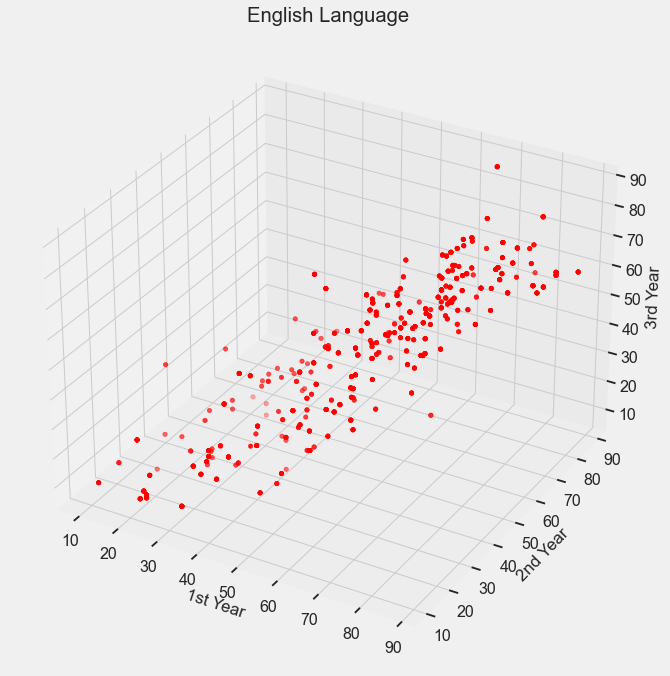

In [1063]:
#Relationship Between English Language Scores over 3 years period

scatterPlot3D(data = internal_marks,
              x = 'Eng1',y = 'Eng2',z = 'Eng3',
              xlabel = '1st Year',ylabel = '2nd Year',zlabel = '3rd Year',
              title = 'English Language')

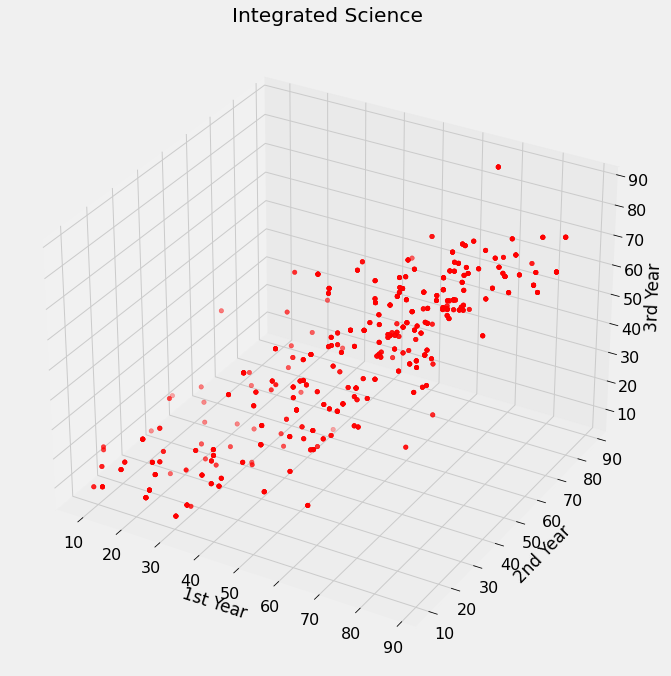

In [151]:
#Relationship Between Integrated Science Score over 3 years period

scatterPlot3D(data = internal_marks,
              x = 'Int1',y = 'Int2',z = 'Int3',
              xlabel = '1st Year',ylabel = '2nd Year',zlabel = '3rd Year',
              title = 'Integrated Science')

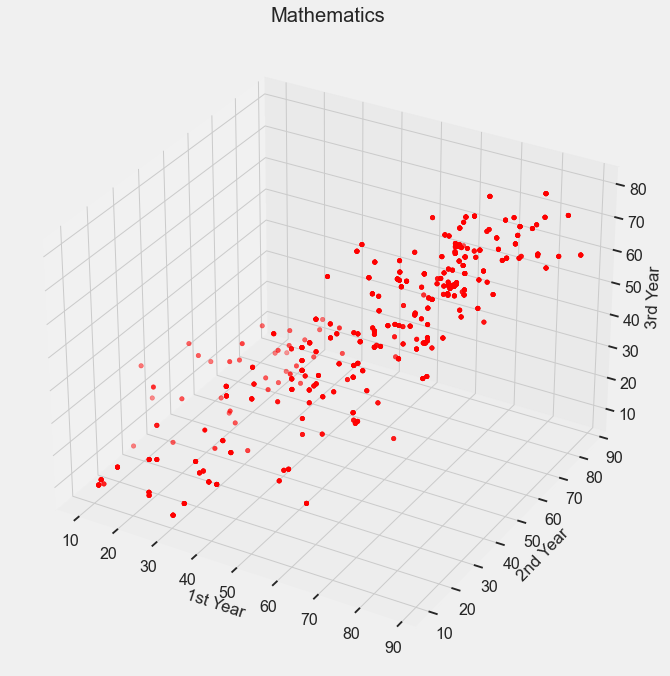

In [1064]:
#Relationship Between Mathematics Scores over 3 years period

scatterPlot3D(data = internal_marks,
              x = 'Math1',y = 'Math2',z = 'Math3',
              xlabel = '1st Year',ylabel = '2nd Year',zlabel = '3rd Year',
              title = 'Mathematics')

## Report

#### Explore the relationship between student's performance in the 3 different subjects | year by year

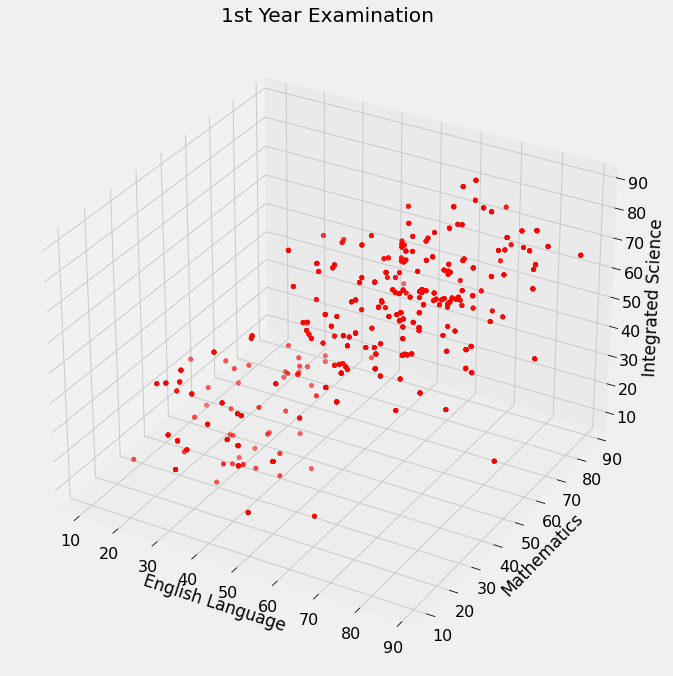

In [155]:
scatterPlot3D(data = internal_marks,
              x = 'Eng1',y = 'Math1',z = 'Int1',
              xlabel = 'English Language',ylabel = 'Mathematics',zlabel = 'Integrated Science',
              title = '1st Year Examination')

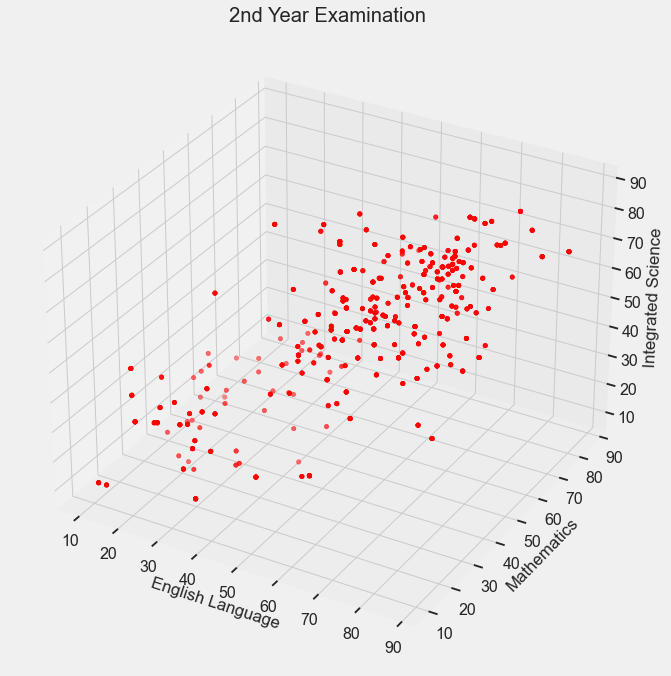

In [1065]:
scatterPlot3D(data = internal_marks,
              x = 'Eng2',y = 'Math2',z = 'Int2',
              xlabel = 'English Language',ylabel = 'Mathematics',zlabel = 'Integrated Science',
              title = '2nd Year Examination')

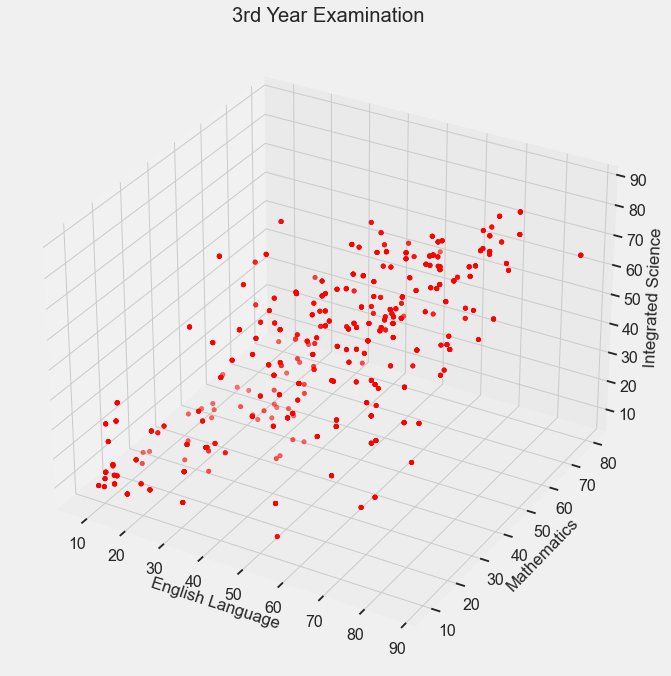

In [1066]:
scatterPlot3D(data = internal_marks,
              x = 'Eng3',y = 'Math3',z = 'Int3',
              xlabel = 'English Language',ylabel = 'Mathematics',zlabel = 'Integrated Science',
              title = '3rd Year Examination')

## Report

## Averaging individual subject scores

In [172]:
#get the average score of each student per subject
def getAverageMarks(data,subject):
    
    column = lambda x: [i for i in data.columns if i.startswith(x)]
    
    sample = data[column(subject)]
    
    total_score = sample.sum(axis = 1)
    
    average_score  = total_score/sample.shape[1]
    
    average_score
    
    return pd.DataFrame(average_score,columns = [subject])

In [173]:
def concatFrames(func):
    
    func = func()
    
    def wrap():
    
        start_time = time.time()
        
        try:
            
            english = func(data = internal_marks,subject = 'Eng') #get average data for english
            
            math = func(data = internal_marks,subject = 'Math')  #get average data for math
            
            science = func(data = internal_marks,subject = 'Int') #get average data for integrated science
        
        except Exception as exc:
        
            print("Error In Function {}".format(func.__name__))
        
            raise exc
            
        data = pd.concat([english,math,science],axis = 1)
        #concatenate dataframes
        
        print("#check nulls#\n\n{}".format(data.isna().any()))
        print("\nExecution Successful \nExecution Time : {} secs".format(round(time.time() - start_time),5))
        return data
        
    return wrap

In [174]:
@concatFrames
def summarizeData():
    return getAverageMarks

In [175]:
#this will generate a new dataframe which we will refer to as end of track (eot)
internal_marks_avg = summarizeData()

#check nulls#

Eng     False
Math    False
Int     False
dtype: bool

Execution Successful 
Execution Time : 0 secs


In [176]:
internal_marks_avg.describe()

,Eng,Math,Int
count,999.000000,999.000000,999.000000
mean,51.798465,52.250918,49.354021
std,16.558866,16.986700,17.012760
min,11.000000,10.333333,9.000000
25%,41.333333,41.166667,37.333333
50%,55.000000,55.666667,52.333333
75%,64.333333,65.333333,62.333333
max,81.000000,81.333333,81.333333


In [1346]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(internal_marks_avg.corr(),annot = True,mask=mask, vmin=-1, vmax=1);
plt.title("Correlation Heatmap");

ValueError: Mask must have the same shape as data.

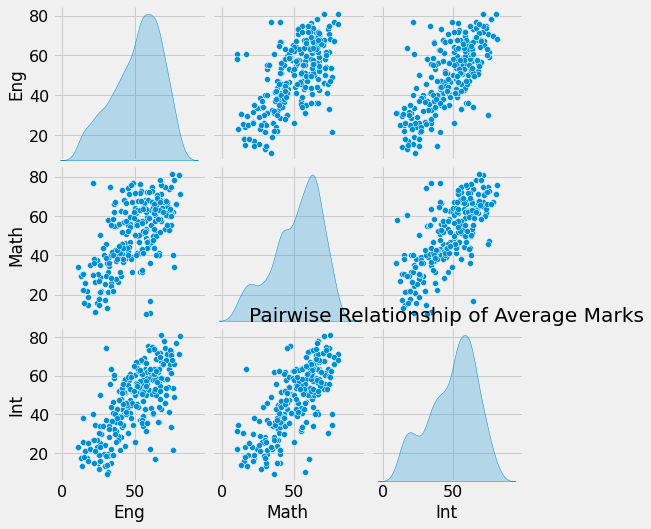

In [180]:
sns.pairplot(internal_marks_avg, kind = "scatter", diag_kind = 'kde');

plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

plt.title('Pairwise Relationship of Average Marks');
plt.show();

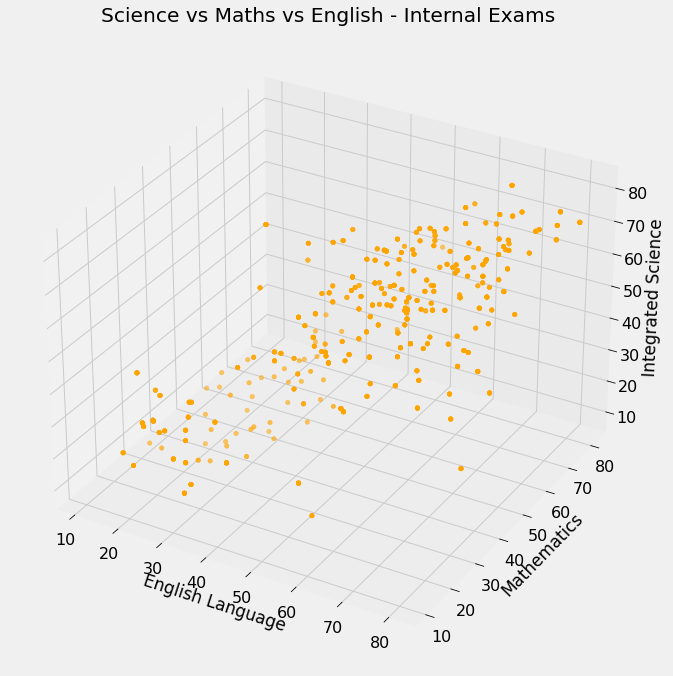

In [181]:
scatterPlot3D(data = internal_marks_avg,
              x = 'Eng',y = 'Math',z = 'Int',
              xlabel = 'English Language',ylabel = 'Mathematics',zlabel = 'Integrated Science',
              title = 'Science vs Maths vs English - Internal Exams',color = 'orange')

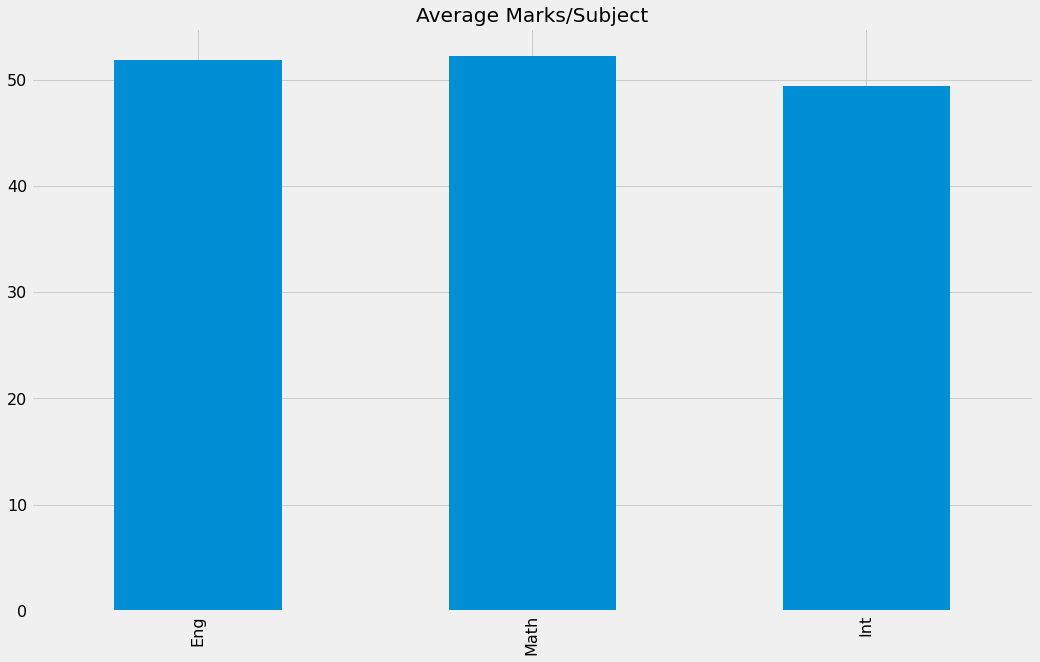

In [185]:
internal_marks_avg.mean().plot(kind = 'bar');
plt.title("Average Marks/Subject");

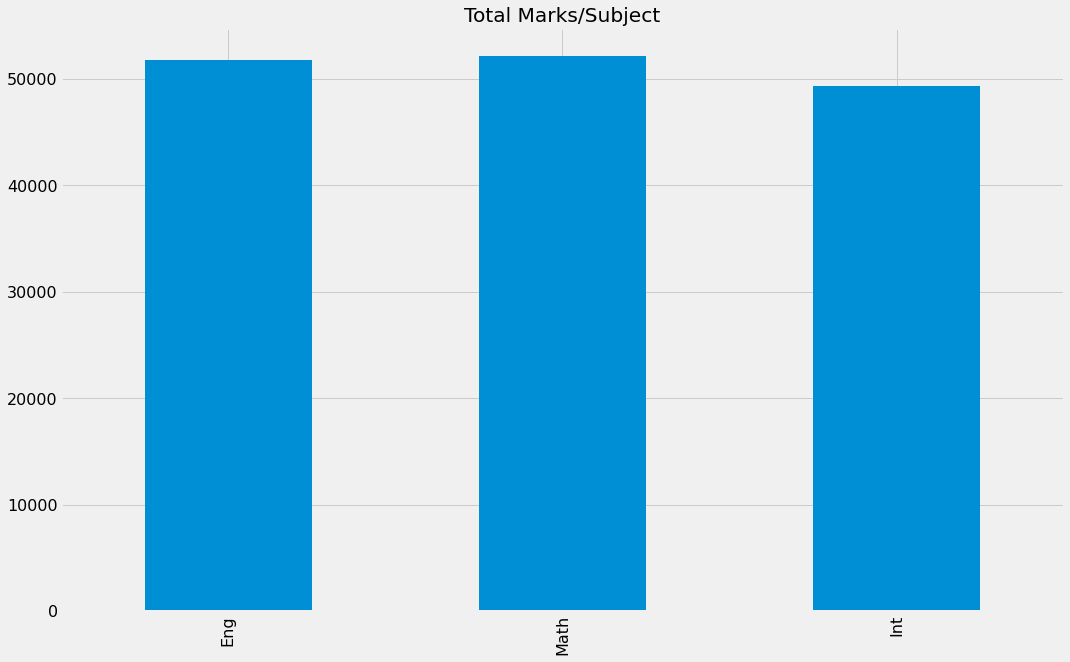

In [186]:
internal_marks_avg.sum().plot(kind = 'bar');
plt.title("Total Marks/Subject");

### Report

# Wasce Grades

In [428]:
large = 22; med = 16; small = 12

params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

plt.rcParams.update(params)
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

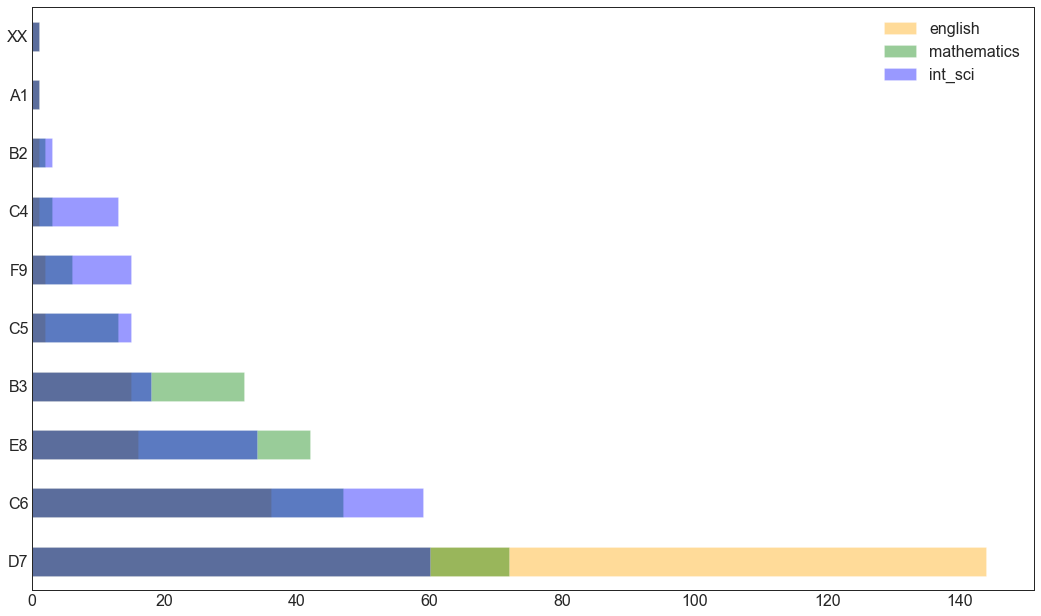

In [429]:
wasce_2019['english'].value_counts().plot(kind = 'barh',color = 'orange',alpha = 0.4);
wasce_2019['mathematics'].value_counts().plot(kind = 'barh',color = 'green',alpha = 0.4);
wasce_2019['int_sci'].value_counts().plot(kind = 'barh',color = 'blue',alpha = 0.4);
plt.legend();

# Research Questions
 1. How does the program of study affect student's grade in english,maths and science (wassce and internal exams)
 2. Effect of Gender on wassce grades
 3. Effect of Gender on internal examation grades
 4. Best performing year in wassce
 5. Trend Analysis of wassce results 2019-2021
 5. Are marks ontained during Internal Examinations a true reflection of what is obtained in waec exams ?
 
 6. How best can we Predict student's grade in English, Maths and Science (Machine Learnig | Artificial Intelligence Algorithms)

In [355]:
df = internal_marks_avg.join(other = wasce,on = 'index',how = 'left')
df = df.rename(columns = {"Eng":"eng_internal",
          "Math":"math_internal",
          "Int":"int_sci_internal",
          "mathematics":"math_wassce",
          "int_sci":"int_sci_wassce",
          "english":"eng_wassce"})
df.head()

,eng_internal,math_internal,int_sci_internal,gender,program,eng_wassce,math_wassce,int_sci_wassce,year
index,,,,,,,,,
2040900119,43.333333,46.333333,51.333333,F,G/A,B2,D7,B3,2019
2040900219,57.666667,49.000000,50.666667,F,G/A,C5,B3,B3,2019
2040900319,46.666667,46.666667,47.333333,F,G/A,C4,B3,B2,2019
2040900419,41.333333,45.666667,42.666667,M,G/A,E8,D7,C4,2019
2040900519,51.333333,57.666667,55.666667,M,G/A,F9,D7,C6,2019


In [358]:
df.isna().sum()

eng_internal         0
math_internal        0
int_sci_internal     0
gender              31
program             31
eng_wassce          31
math_wassce         31
int_sci_wassce      31
year                31
dtype: int64

In [361]:
df = df.dropna(subset = ['gender','program','eng_wassce','math_wassce','int_sci_wassce','year'],how = 'all')

In [482]:
df['gender'].value_counts()

M    499
F    469
Name: gender, dtype: int64

## Gender

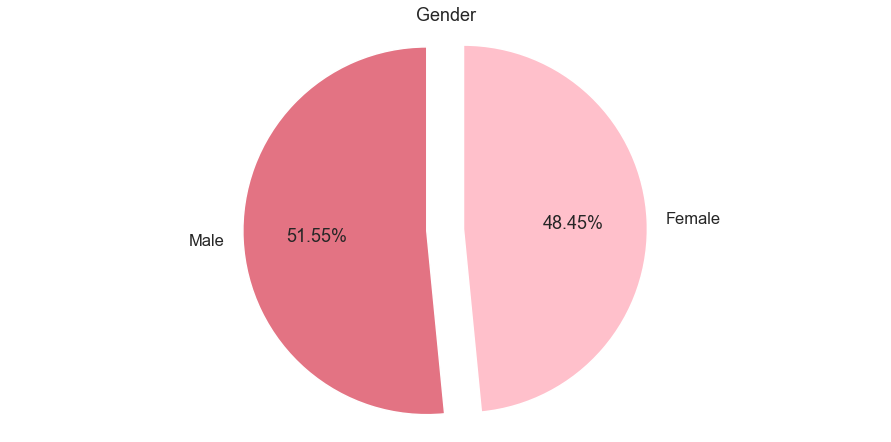

In [483]:
plt.figure(figsize=(14, 7))
labels=['Male','Female']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#E37383','#FFC0CB'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

### Effect of Gender on Wassce Grades

In [1190]:
def gender_vs_grade(data:pd.DataFrame,
                    y:pd.Series,ylabel:str,
                    title:str = 'Gender vs Wassce Grades',
                    order:list = ["A1","B2","B3","C4","C5","C6","D7","E8","F9"],
                    figsize = (14,8)):
    
    "Effect of Gender on wassce grades"
    
    plt.figure(figsize = figsize)
    sns.set_context("talk",font_scale = 1)
    sns.set_palette("pastel")
    ax = sns.countplot(y = y, hue = "gender", data = data, order = order)
    ax.legend(loc = 'upper right',frameon = True)
    plt.title(title, fontsize = 18, fontweight = 'bold')
    ax.set(xlabel = 'Count',ylabel = ylabel)
    plt.show()

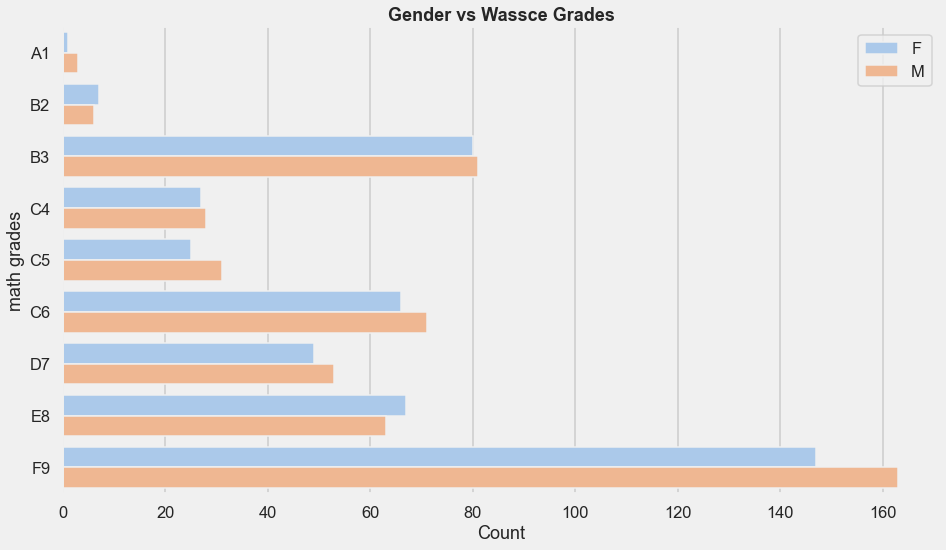

In [1191]:
gender_vs_grade(data = df,y ='math_waec',ylabel = 'math grades')

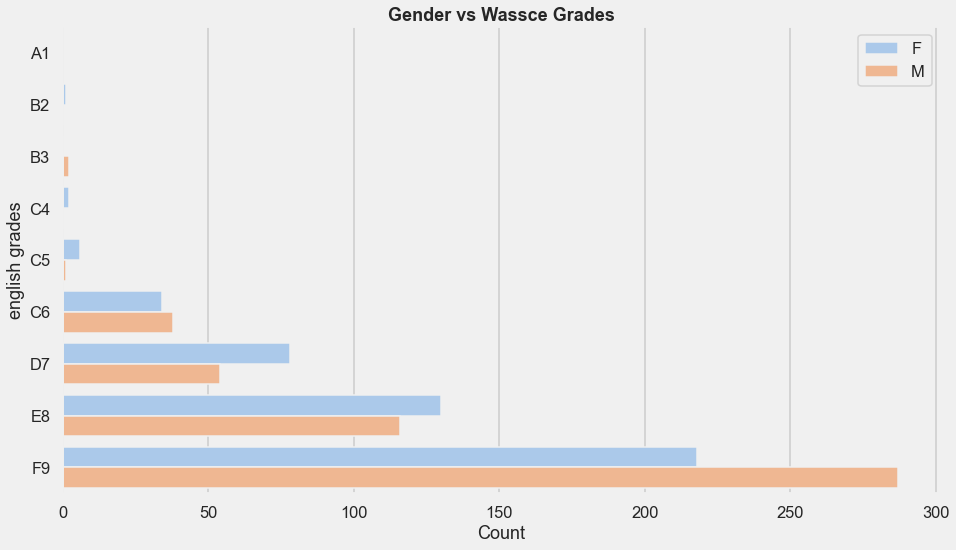

In [1182]:
gender_vs_grade(data = df,y = 'eng_waec',ylabel = 'english grades')

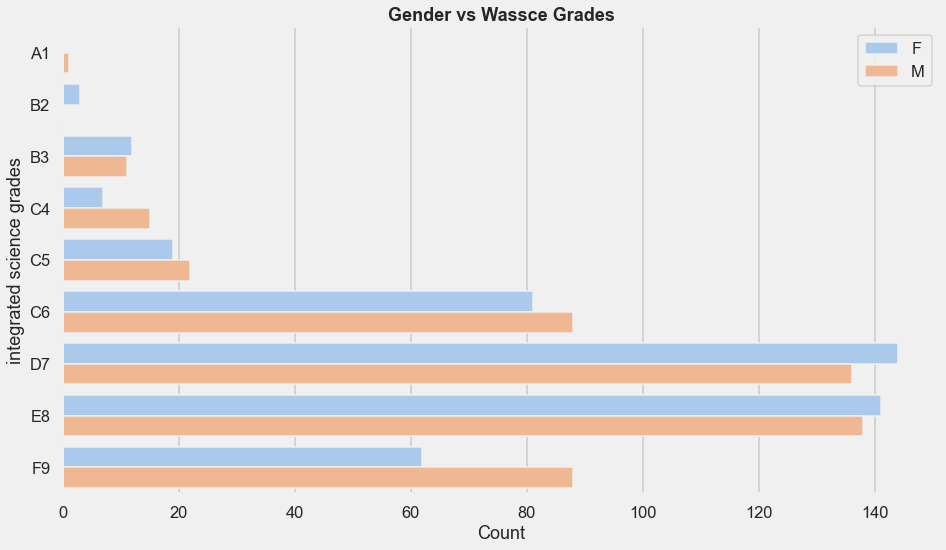

In [1183]:
gender_vs_grade(data = df, y = 'sci_waec',ylabel = 'integrated science grades')

In [1439]:
myColorList = [
    'orchid', '#ff6666', 'aquamarine', '#66b3ff',
    'chocolate','gold','orange','#c2c2f0','#ffb3e6',
    '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6',
    '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6',
    '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6'
]

In [1145]:
def binarize_grades(grade):
    if grade in ['A1','B2','B3','C4','C5','C6']:
        return 'pass'
    if grade in ['D7','E8','F9']:
        return 'fail'
    else:
        return 'odd'

In [1146]:
df['math_waec_bin'] = df.apply(lambda x : binarize_grades(x["math_waec"]), axis=1)
df['eng_waec_bin'] = df.apply(lambda x : binarize_grades(x["eng_waec"]), axis=1)
df['sci_waec_bin'] = df.apply(lambda x : binarize_grades(x["sci_waec"]), axis=1)

In [1172]:
df = df.reindex(sorted(df.columns), axis=1) #rearranging columns
df.head(2)

,eng_waec,eng_waec_bin,eng_yr1,eng_yr2,eng_yr3,gender,math_waec,math_waec_bin,math_yr1,math_yr2,math_yr3,program,sci_waec,sci_waec_bin,sci_yr1,sci_yr2,sci_yr3,year
0,B2,pass,45.0,41.0,44.0,F,D7,fail,51.0,47.0,41.0,G/A,B3,pass,40.0,45.0,69.0,2019
1,C5,pass,56.0,57.0,60.0,F,B3,pass,52.0,44.0,51.0,G/A,B3,pass,43.0,54.0,55.0,2019


In [347]:
df.groupby('year')['gender'].value_counts()

year  gender
2019  M         121
      F          95
2020  F         206
      M         199
2021  M         179
      F         168
Name: gender, dtype: int64

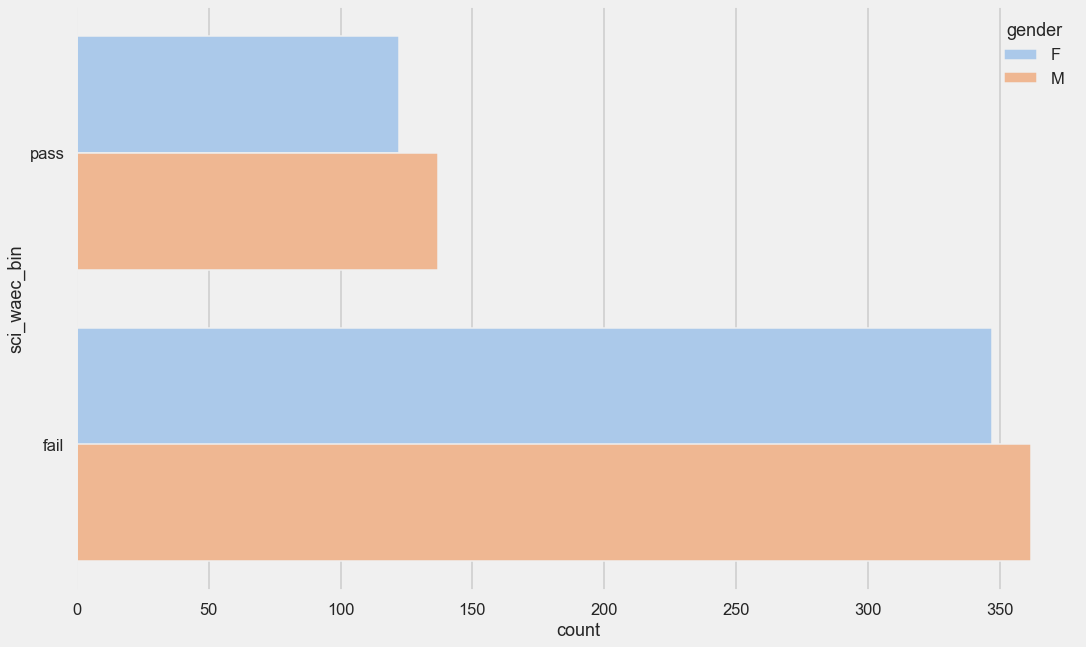

In [1246]:
sns.countplot(y='sci_waec_bin', hue="gender", data=df);

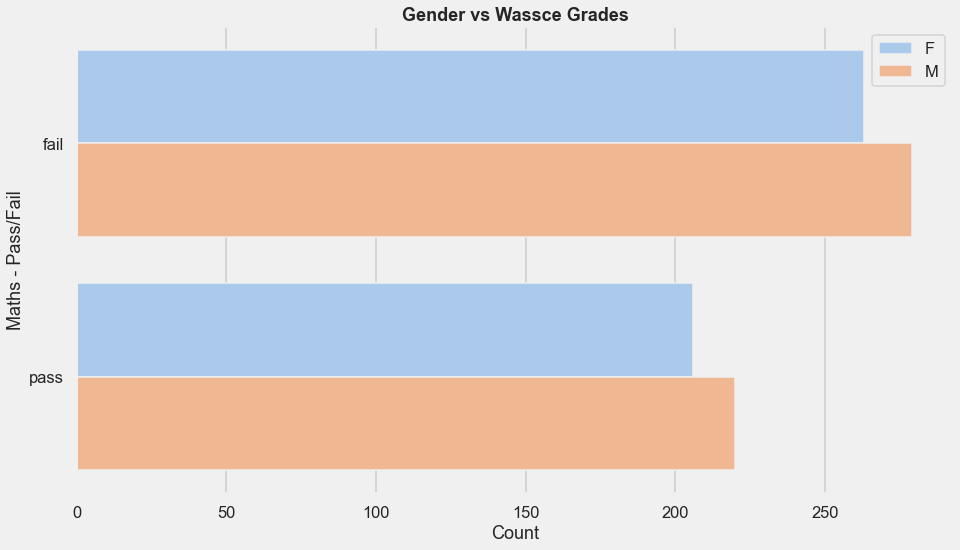

In [1245]:
gender_vs_grade(y='math_waec_bin', data=df,order = None,ylabel = 'Maths - Pass/Fail')

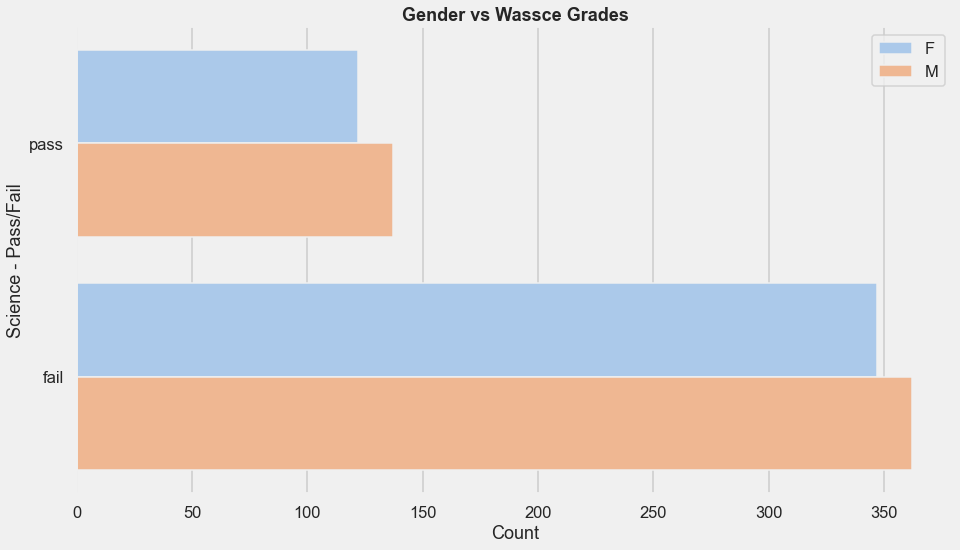

In [1205]:
gender_vs_grade(y='sci_waec_bin', data=df,order = None,ylabel = 'Science - Pass/Fail')

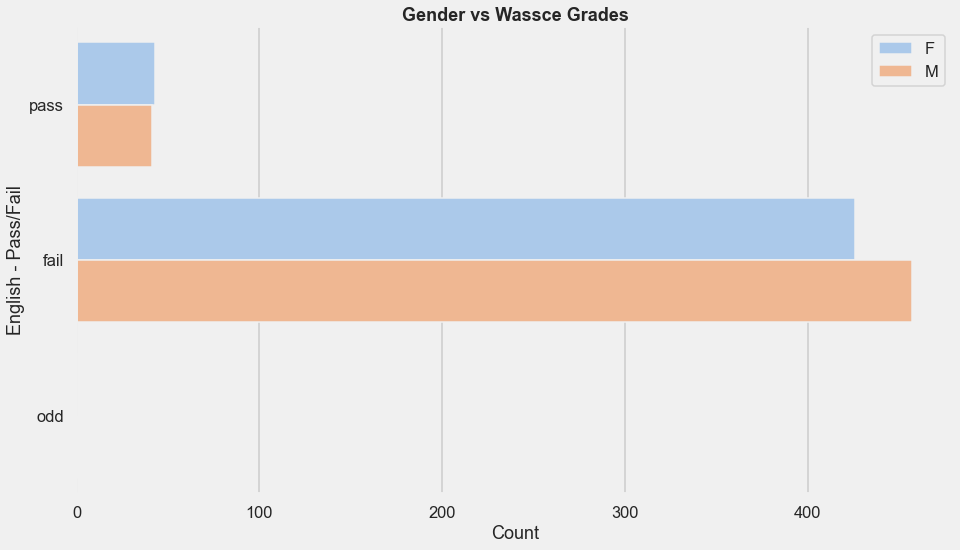

In [1206]:
gender_vs_grade(y='eng_waec_bin', data=df,order = None,ylabel = 'English - Pass/Fail')

In [377]:
df.groupby('gender')[["eng_internal","math_internal","int_sci_internal"]].mean()

,eng_internal,math_internal,int_sci_internal
gender,,,
F,51.658849,51.638948,49.536603
M,51.855711,52.762859,49.081496


In [ ]:
def yearly_performance_by_gender():
    df.query("gender == 'M' and year == '2019'")[["eng_internal","math_internal","int_sci_internal"]]\
    .mean().plot(kind = 'bar',alpha = 0.4)
    df.query("gender == 'F'and year == '2019'")[["eng_internal","math_internal","int_sci_internal"]].mean().plot(kind = 'bar',color = 'red',alpha = 0.3)

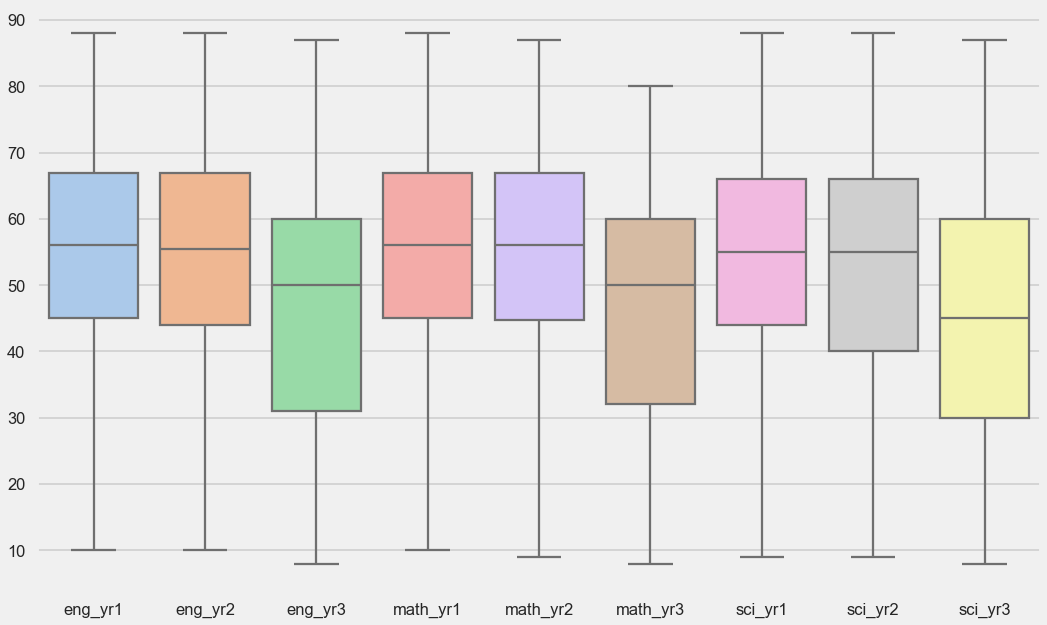

In [1322]:
sns.boxplot(data = df,whis = 2);

In [1453]:
plt.bar?

In [1450]:
def internal_exam_vs_gender(subject,title):
    
    subject = [x for x in df.columns if x.startswith(subject)]
    
    df.groupby('gender')[subject[0]].mean().plot(kind = 'bar',color = '#ff6666')
    df.groupby('gender')[subject[1]].mean().plot(kind = 'bar',color = '#E37383')
    df.groupby('gender')[subject[2]].mean().plot(kind = 'bar',color = '#FFC0CB') # ['#E37383','#FFC0CB']
    plt.ylabel("Average Marks")
    plt.legend(['Year 1', "Year 2","Year 3"]);
    plt.title("Performance In {}/Year".format(title))
    plt.show()

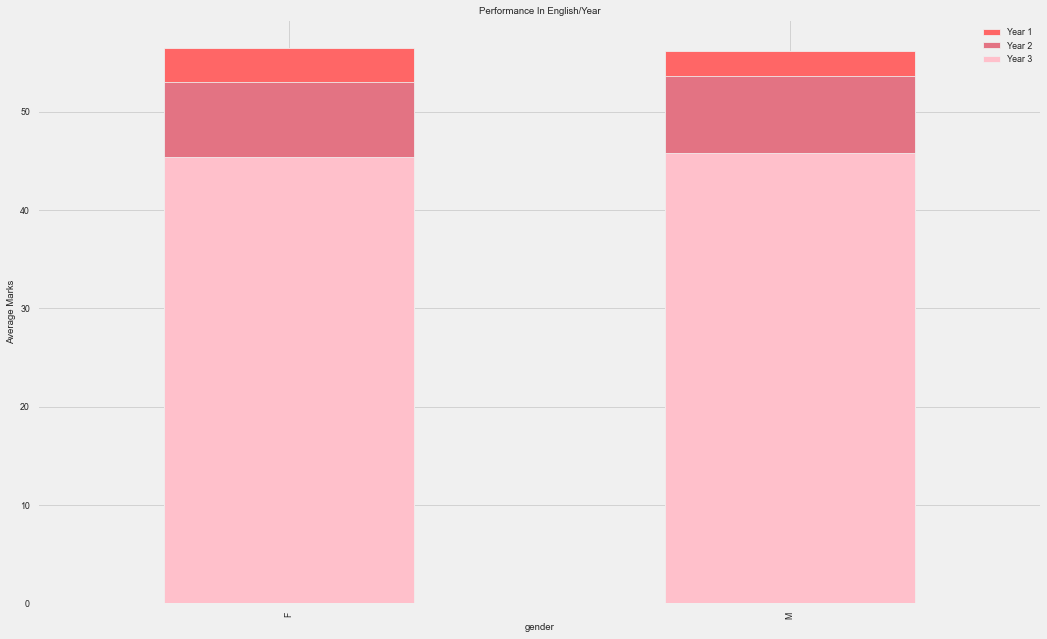

In [1451]:
internal_exam_vs_gender(subject = 'eng_y',title = 'English')

In [1441]:
plt.text?

Student performance in English Language during their first year at the school is better compared to the second and third
Males performed slightly better than females during the first year only.

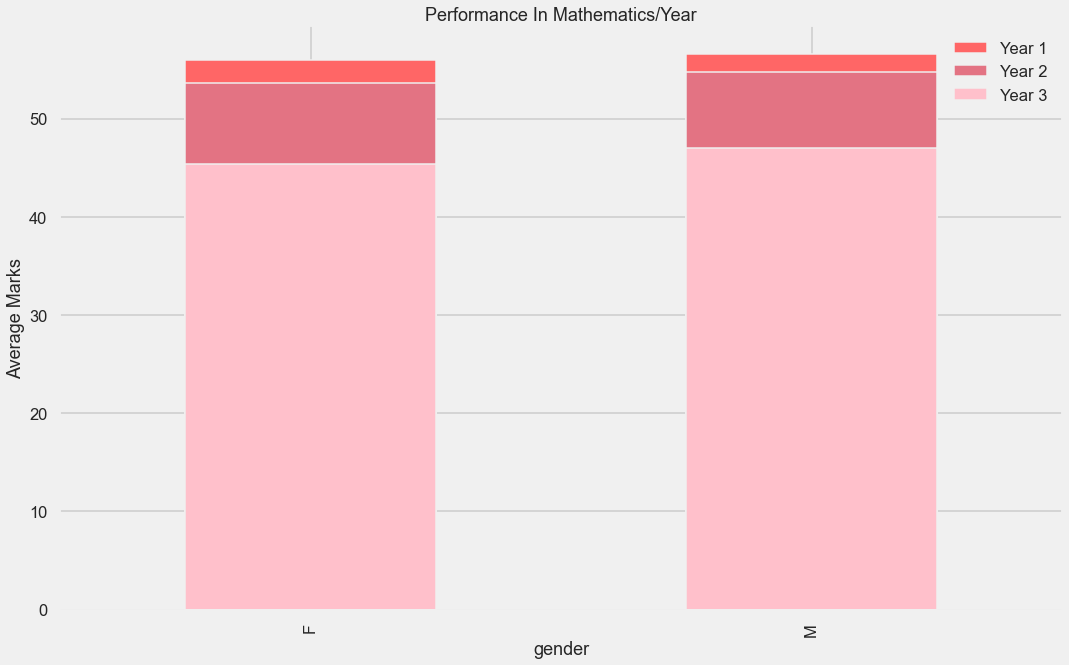

In [1296]:
internal_exam_vs_gender(subject = 'math_y',title = 'Mathematics')

Student performance in Mathematics during their first year at the school is better compared to the second and third Males performed slightly better than females during the first year only.

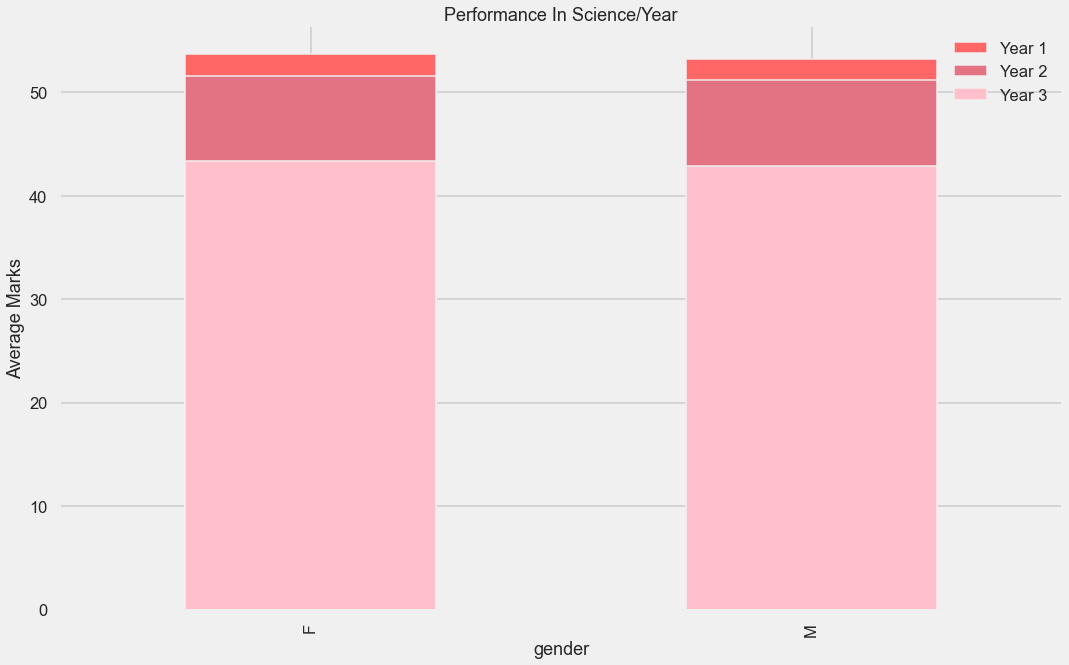

In [1288]:
internal_exam_vs_gender(subject = 'sci_y',title = 'Science')

In [1342]:
df.head()

,eng_waec,eng_waec_bin,eng_yr1,eng_yr2,eng_yr3,gender,math_waec,math_waec_bin,math_yr1,math_yr2,math_yr3,program,sci_waec,sci_waec_bin,sci_yr1,sci_yr2,sci_yr3,year
0,B2,pass,45.0,41.0,44.0,F,D7,fail,51.0,47.0,41.0,G/A,B3,pass,40.0,45.0,69.0,2019
1,C5,pass,56.0,57.0,60.0,F,B3,pass,52.0,44.0,51.0,G/A,B3,pass,43.0,54.0,55.0,2019
2,C4,pass,41.0,45.0,54.0,F,B3,pass,42.0,54.0,44.0,G/A,B2,pass,48.0,52.0,42.0,2019
3,E8,fail,43.0,40.0,41.0,M,D7,fail,43.0,51.0,43.0,G/A,C4,pass,39.0,45.0,44.0,2019
4,F9,fail,55.0,54.0,45.0,M,D7,fail,66.0,55.0,52.0,G/A,C6,pass,62.0,60.0,45.0,2019


In [1419]:
df['eng_internal'] = df[['eng_yr1','eng_yr2','eng_yr3']].mean(axis= 1)
df['math_internal'] = df[['math_yr1','math_yr2','math_yr3']].mean(axis= 1)
df['sci_internal'] = df[['sci_yr1','sci_yr2','sci_yr3']].mean(axis= 1)

In [1420]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# # creating dummies for gender
# data['gender'] = df['gender'].map({'Male':0, 'Female':1})
  
    
# # the independent variables set
# X = data[['Gender', 'Height', 'Weight']]
  
# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

In [1433]:
df.head(3)

,eng_waec,eng_waec_bin,eng_yr1,eng_yr2,eng_yr3,gender,math_waec,math_waec_bin,math_yr1,math_yr2,...,program,sci_waec,sci_waec_bin,sci_yr1,sci_yr2,sci_yr3,year,eng_internal,math_internal,sci_internal
0,B2,pass,45.0,41.0,44.0,F,D7,fail,51.0,47.0,...,G/A,B3,pass,40.0,45.0,69.0,2019,43.333333,46.333333,51.333333
1,C5,pass,56.0,57.0,60.0,F,B3,pass,52.0,44.0,...,G/A,B3,pass,43.0,54.0,55.0,2019,57.666667,49.000000,50.666667
2,C4,pass,41.0,45.0,54.0,F,B3,pass,42.0,54.0,...,G/A,B2,pass,48.0,52.0,42.0,2019,46.666667,46.666667,47.333333


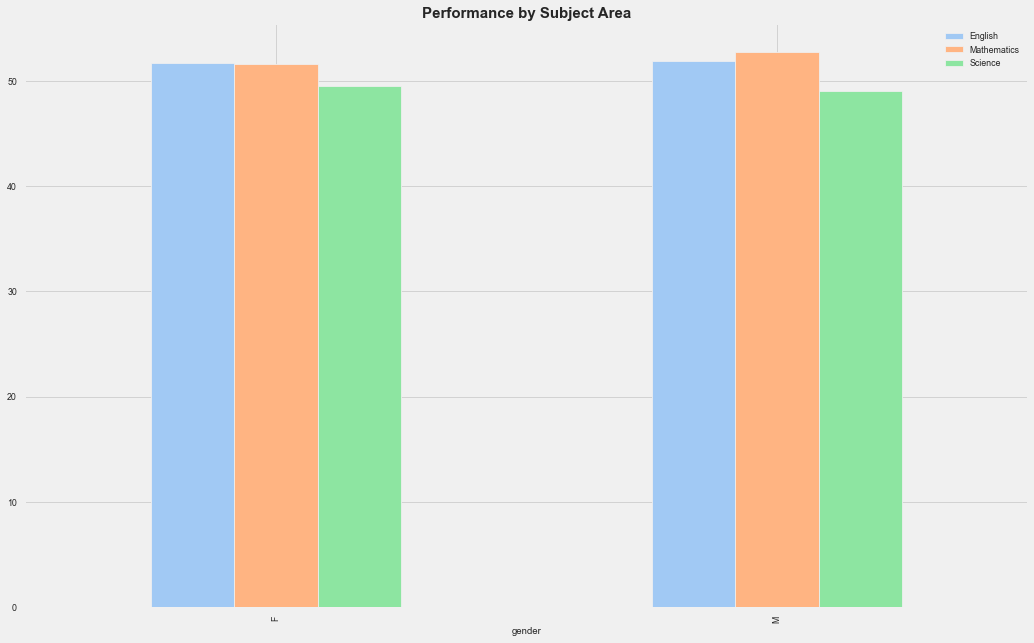

In [1436]:
df.groupby('gender')[["eng_internal","math_internal","sci_internal"]].mean().plot(kind = 'bar');
plt.title('Performance by Subject Area',fontsize=15, fontweight='bold');
plt.legend(['English','Mathematics',"Science"]);

In [1423]:
def plot_gender_against_marks(data,x:str,title:str,fill = False):
    
    "Effect of Gender on Internal Marks"
    
    sns.kdeplot(data = df,x = x,hue = 'gender',fill = fill);
    plt.title('Effect of Gender on {}'.format(title),fontsize=15, fontweight='bold');
    plt.xlabel('{} Scores'.format(title))
    plt.legend(['Female','Male']);

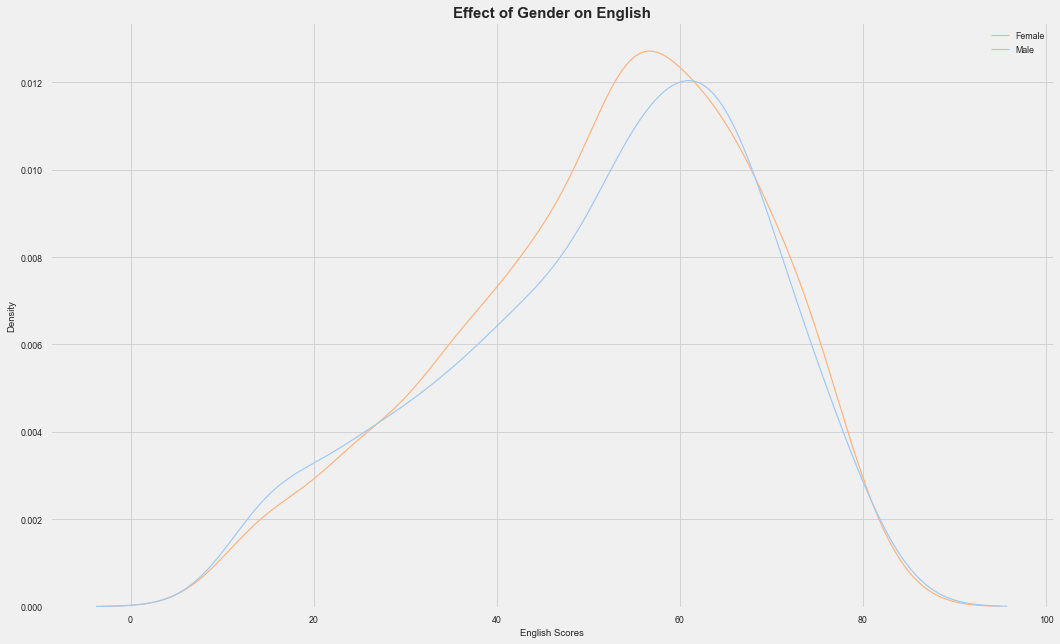

In [1424]:
plot_gender_against_marks(data = df,x = 'eng_internal',title = 'English')

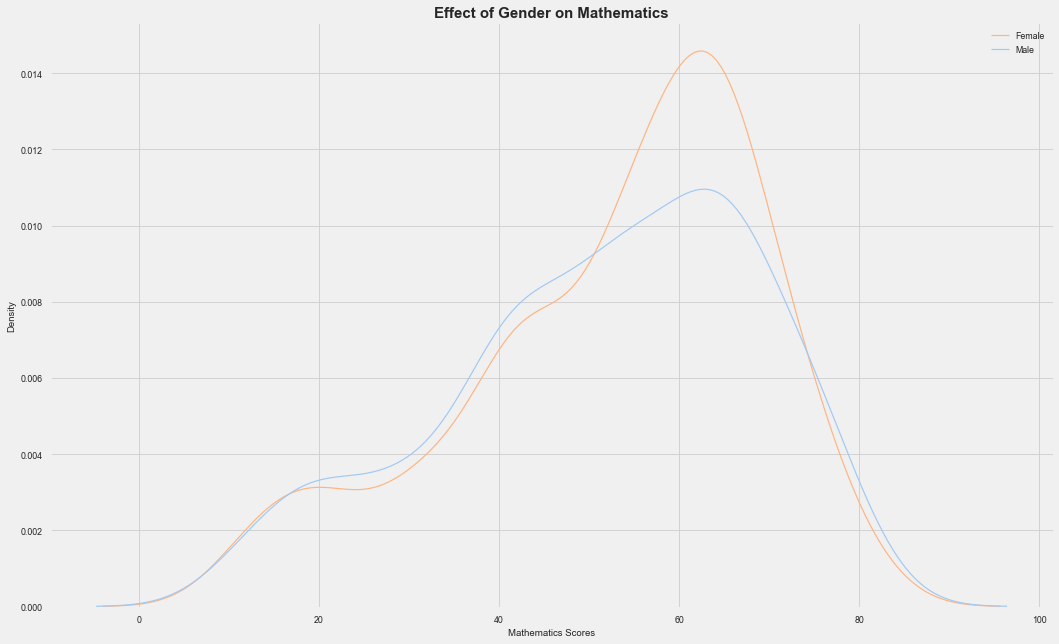

In [1425]:
plot_gender_against_marks(data = df,x = 'math_internal',title = 'Mathematics')

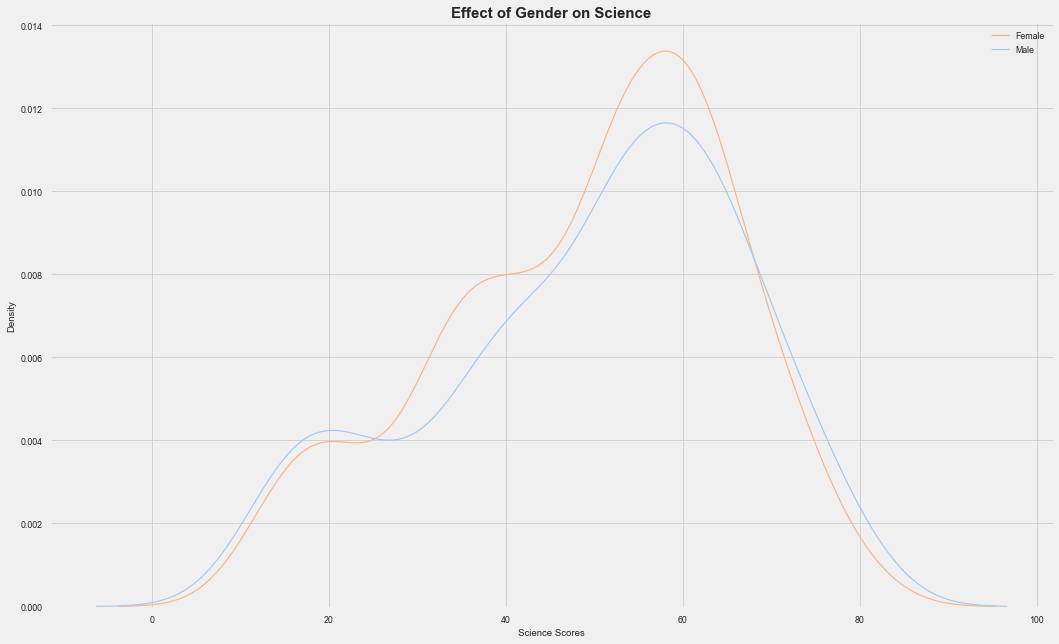

In [1426]:
plot_gender_against_marks(data = df,x = 'sci_internal',title = 'Science')

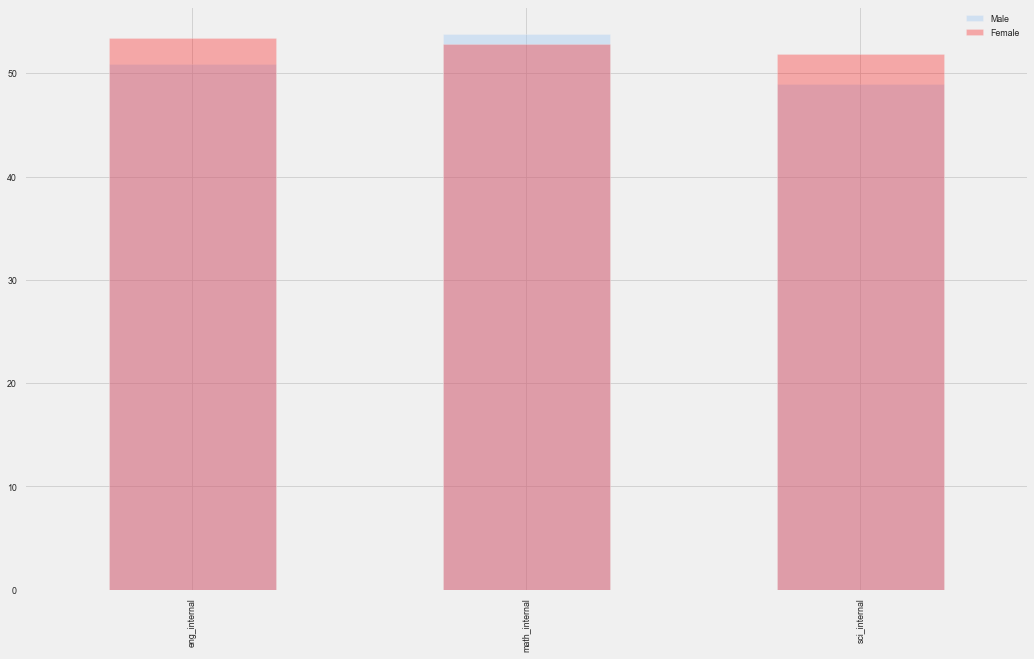

In [1428]:
df.query("gender == 'M' and year == '2019'")[["eng_internal","math_internal","sci_internal"]].mean().plot(kind = 'bar',alpha = 0.4)
df.query("gender == 'F'and year == '2019'")[["eng_internal","math_internal","sci_internal"]].mean().plot(kind = 'bar',color = 'red',alpha = 0.3)
plt.legend(['Male','Female']);

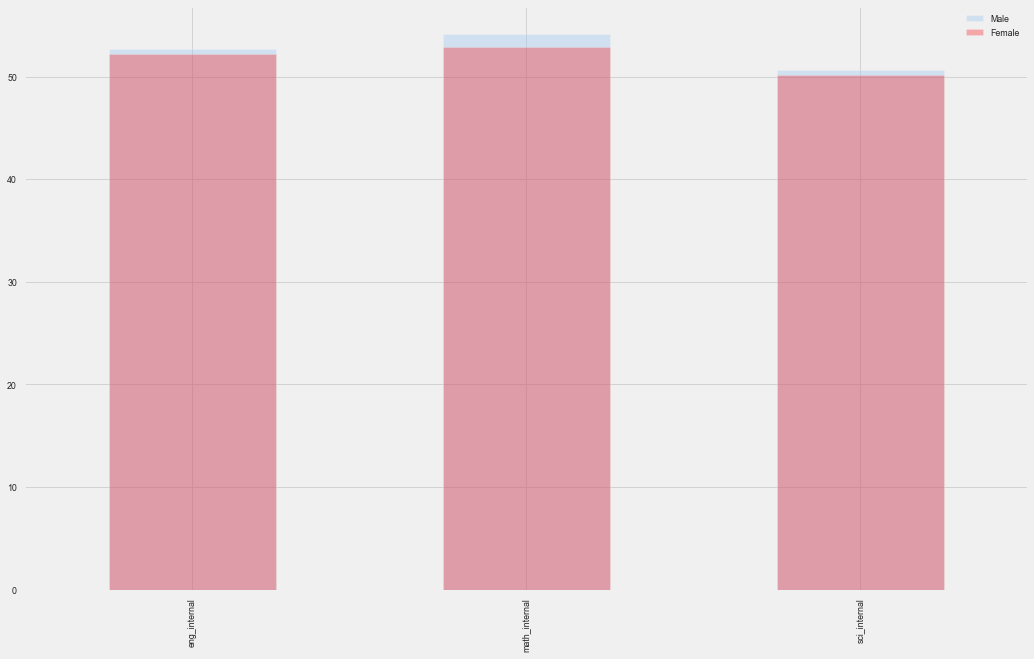

In [1430]:
df.query("gender == 'M' and year == '2020'")[["eng_internal","math_internal","sci_internal"]].mean().plot(kind = 'bar',alpha = 0.4)
df.query("gender == 'F'and year == '2020'")[["eng_internal","math_internal","sci_internal"]].mean().plot(kind = 'bar',color = 'red',alpha = 0.3)
plt.legend(['Male','Female']);

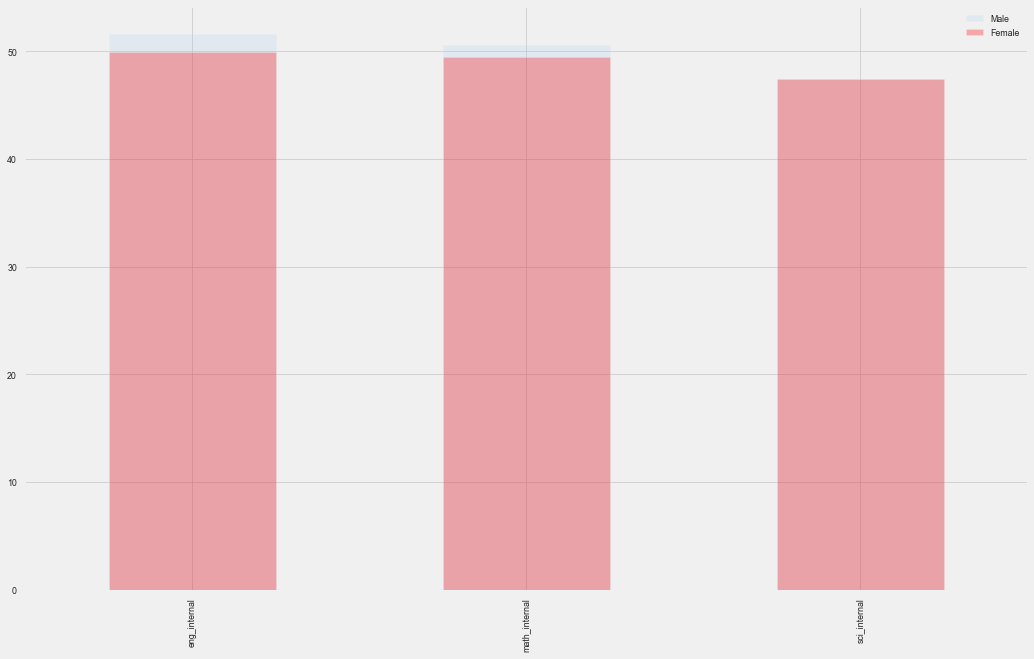

In [1431]:
df.query("gender == 'M' and year == '2021'")[["eng_internal","math_internal","sci_internal"]].mean().plot(kind = 'bar',alpha = 0.2)
df.query("gender == 'F'and year == '2021'")[["eng_internal","math_internal","sci_internal"]].mean().plot(kind = 'bar',color = 'red',alpha = 0.3)
plt.legend(['Male','Female']);

## Program

In [1088]:
df.program.unique()

array(['G/A', 'V/A', 'SCI', 'BUS', 'AGRIC', 'H/E'], dtype=object)

In [1104]:
df.program.value_counts()

G/A      528
H/E      140
V/A      131
BUS       93
SCI       38
AGRIC     38
Name: program, dtype: int64

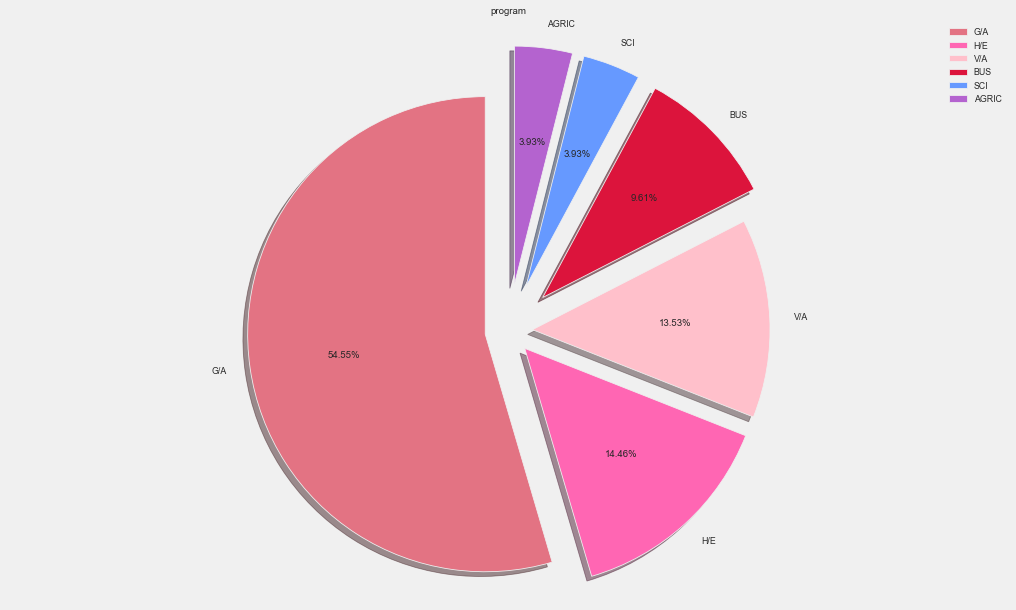

In [1106]:
plt.pie(df['program'].value_counts(),labels = ['G/A','H/E','V/A','BUS','SCI','AGRIC'],
        explode=[0.1,0.1,0.1,0.2,0.2,0.2],#*len(df.program.unique()),
        autopct='%1.2f%%',
        colors=['#E37383','#ff66b3','#FFC0CB','#DC143C','#6699ff','#b463cf'],
        startangle=90,
        shadow = True)
plt.title('program')
plt.axis('equal')
plt.legend()
plt.show()